# PART 1: Raw Dataset

In this project, we are working with the **Australian Road Fatalities** dataset, which consists of two key files:

- **`bitre_fatal_crashes_dec2024.xlsx`**: This dataset contains detailed information about each fatal road crash that occurred in Australia, including attributes such as crash type, state, speed limit, vehicle involvement (e.g., bus, truck), time and date, and geographic classification (e.g., SA4, LGA, remoteness area).

- **`bitre_fatalities_dec2024.xlsx`**: This dataset provides information about individuals who died in these crashes, including demographic variables (age, age group, gender), their role in the crash (e.g., driver, pedestrian), and time and location of death.

- The overall objective of this project is to build a data warehouse from the Australian Road Fatalities dataset and carry out association rule mining.


# PART 2: Identifying the Usage

Before designing a data warehouse, it is crucial to understand the business needs of our clients in advance. This ensures that our data warehouse is tailor-made to fully serve our clients' queries and provide value-added insights.

In this project, I have identified 1 client as follows:

---

#### A. Australian Road Safety Commission (ARSC)

**Goal**: *To identify high-risk patterns and support data-driven road safety policies aimed at reducing traffic fatalities in Australia.*

To effectively develop and evaluate national traffic safety initiatives, the Australian Road Safety Commission requires in-depth data analysis on road crash patterns, fatality distributions, and contributing factors such as vehicle type, road conditions, and geographic remoteness. The client seeks to utilise the insights gained from this data warehouse to inform regional policy-making, enhance public safety awareness campaigns, and target enforcement or infrastructure upgrades where they are needed most.

The dataset in use includes detailed records of fatal road crashes and individual fatality information, spanning various dimensions including crash type, age group, vehicle involvement, geography (state, LGA, remoteness), and time of occurrence. By analysing these multidimensional data points, the client expects to detect emerging patterns, compare different road user groups, and evaluate the effectiveness of current safety regulations.

Given the wide geographic diversity of Australia—from major urban centres to remote rural areas—the client is particularly interested in spatial disparities in crash outcomes. The data warehouse supports this analysis by allowing aggregation and filtering by detailed geography and road context dimensions.

---

For this project, the 6 types of business queries aimed to be analysed are:

- **Business Query 1**: Which age group of road users is most likely to die in road crashes?
- **Business Query 2**: Which road user type (e.g., pedestrian, cyclist, motorcyclist) has the highest fatality rate on roads with speed limits over 80 km/h?
- **Business Query 3**: Do younger victims (under 25) tend to die more in crashes involving heavy trucks or buses?
- **Business Query 4**: Are weekend crashes more likely to result in fatalities among passengers compared to drivers?
- **Business Query 5**: What is the most common crash type (Single or Multiple) across different Australian states or remoteness areas?
- **Business Query 6**: Is there a gender disparity in crash fatalities across different regions and remoteness categories?



### PART 3: Concept Hierarchies & StarNet Model

#### a. Concept Hierarchies

To create a StarNet Model for our traffic fatality data warehouse, we must first identify all dimensions and establish the corresponding concept hierarchy for each dimension. A concept hierarchy allows us to drill down from higher-level aggregated data to more granular details, which improves both the flexibility and value of analysis.

To serve the business needs of our client—the Australian Road Safety Commission—the grain of our fact table is defined as one row per fatality, where each record corresponds to an individual who died in a fatal road crash. This allows our data warehouse to support person-level analysis across various demographic, geographic, and contextual dimensions.

Each fatality record is linked to a corresponding crash, and enriched by additional information including:
- personal attributes (such as age, gender, road user role),
- crash characteristics (such as crash type and speed limit),
- vehicle involvement (such as heavy trucks or buses),
- time and holiday context,
- and detailed geographic data (state, LGA, remoteness).

This level of granularity allows stakeholders to answer highly targeted queries—for instance, whether younger passengers are more likely to die in remote areas, or if crashes involving buses tend to happen more on weekends.

Based on the grain statement, we have identified 8 dimensions in our data warehouse. We detailed the rationale and concept hierarchy structure of these dimensions as follows:



#### Road Dimension
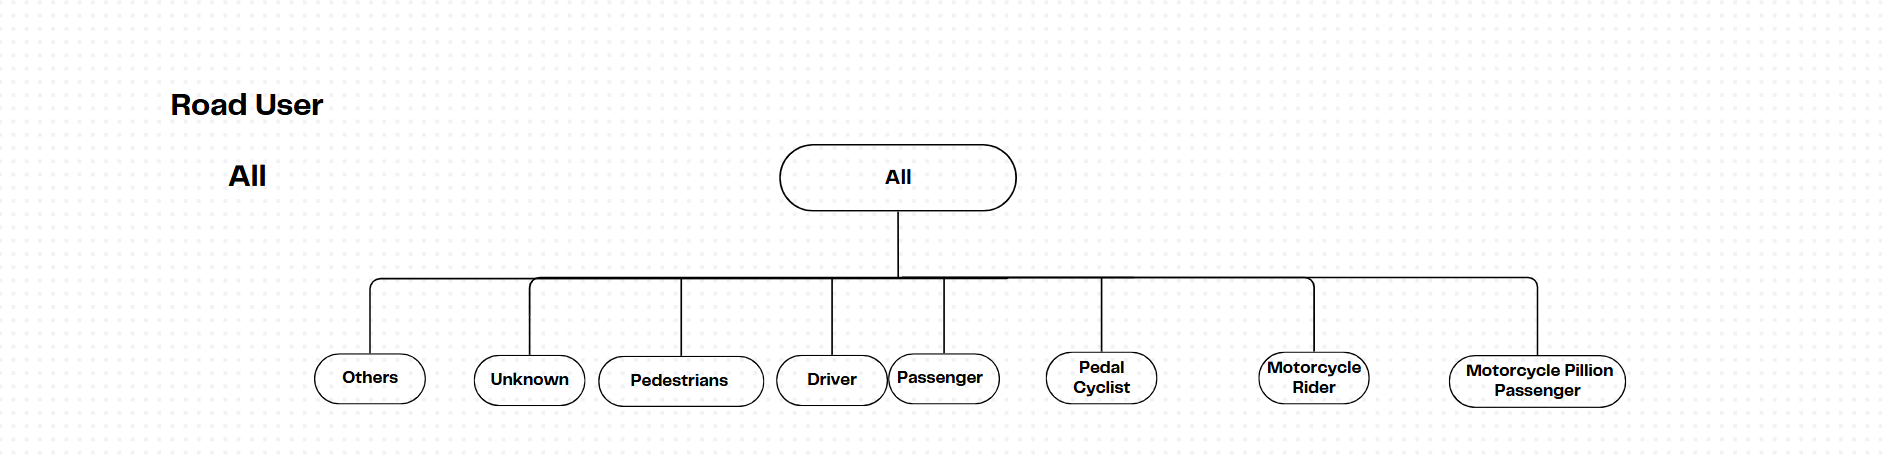
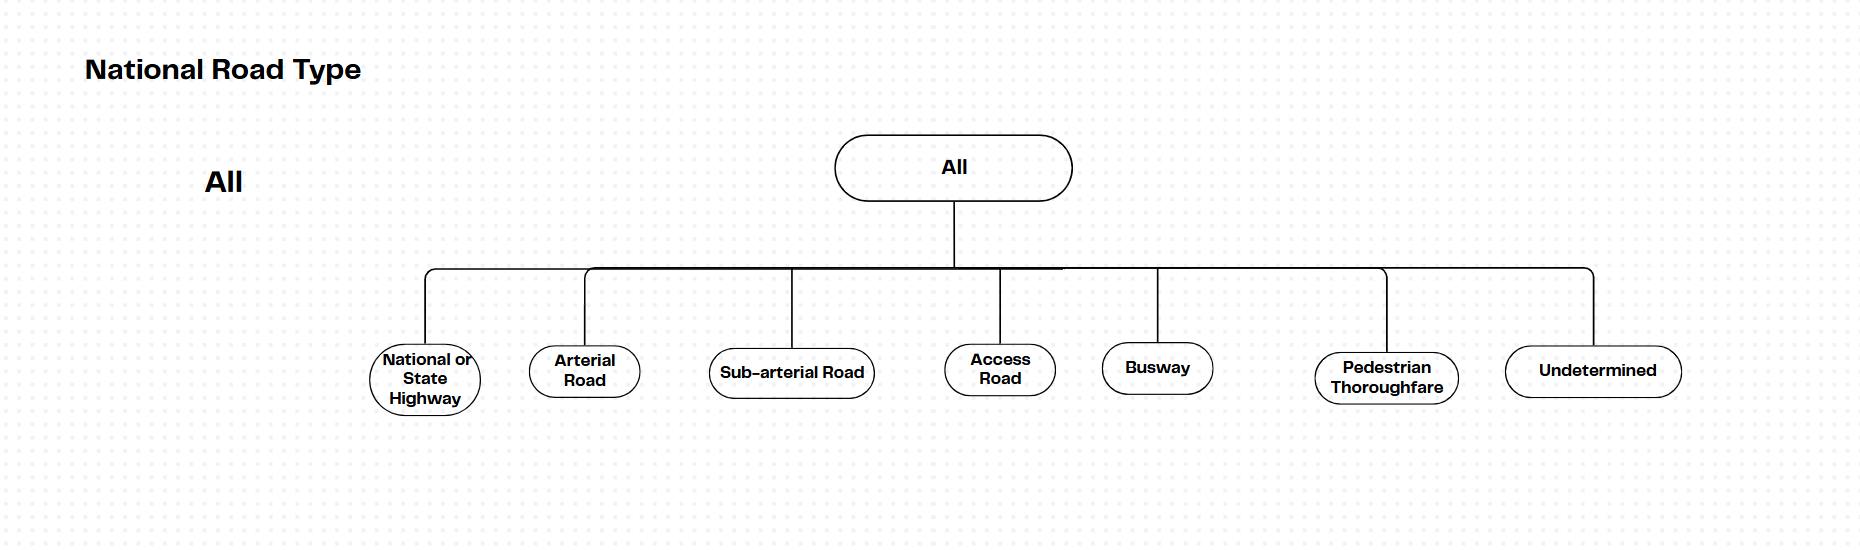

The Road dimension is essential for capturing the characteristics of the physical environment where crashes occur. This dimension is structured with two distinct concept hierarchies: Road User Type and National Road Type, each offering a different analytical perspective on how road conditions and user roles may contribute to fatalities.

The Road User Type hierarchy drills down from “All” to categories such as Driver, Passenger, Pedestrian, Cyclist, and various motorcycle-related roles, providing insights into which types of users are most vulnerable in different crash scenarios.

Simultaneously, the National Road Type hierarchy segments roads into standardized categories including Highways, Arterial Roads, Busways, and Pedestrian Thoroughfares. This classification reflects the functional role of the road infrastructure in crash incidents.

By keeping these two hierarchies within the same dimension, we maintain a compact model while supporting dual perspectives: the behavior of users and the structure of the roads. This structure is particularly relevant for policy makers and transport authorities aiming to improve road safety outcomes across diverse transport environments.

#### Fatalities Dimension
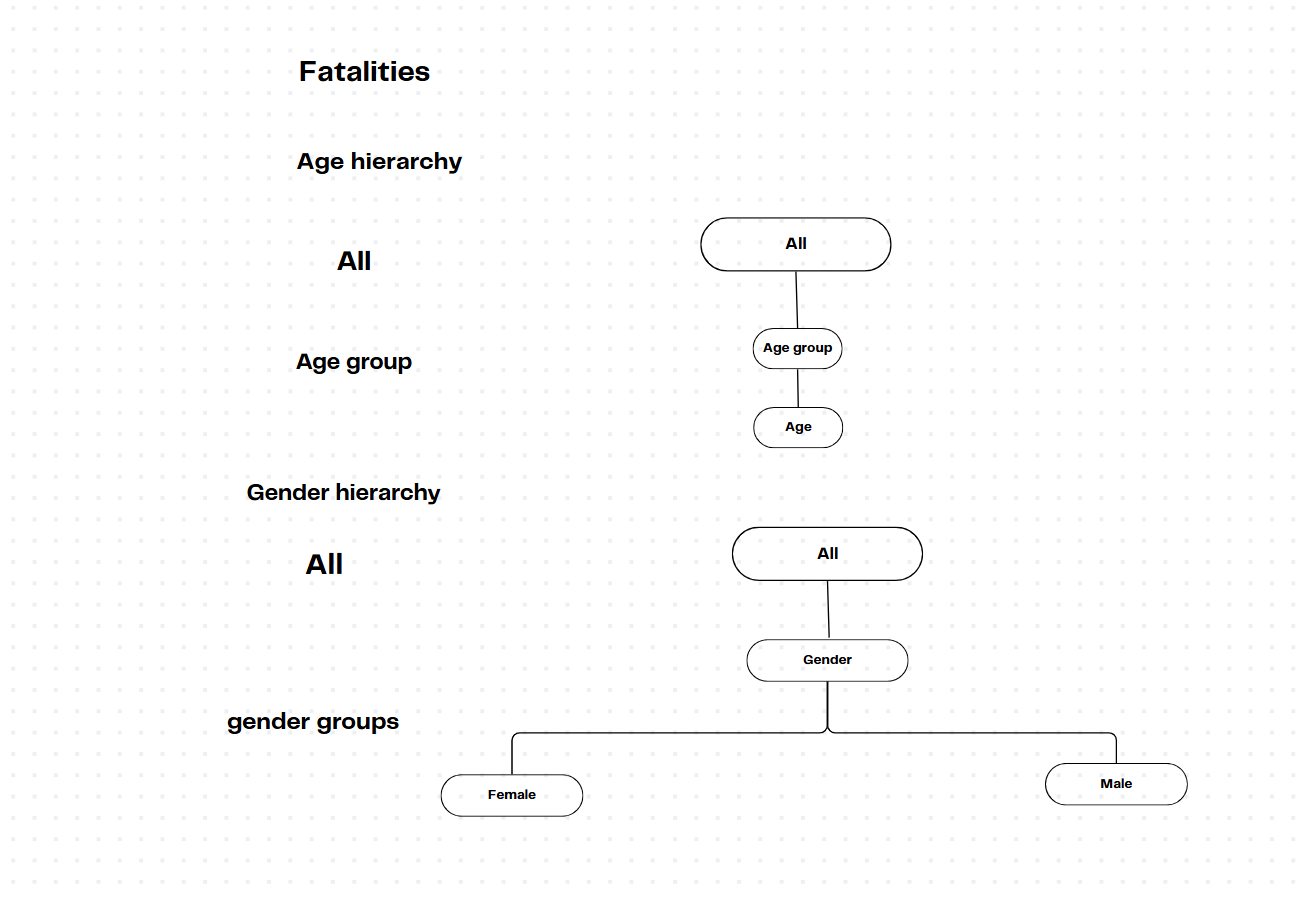

The Fatalities dimension captures demographic and behavioral characteristics of individuals who died in fatal crashes. It provides crucial context for understanding which types of road users are most affected, and how personal attributes such as age and gender relate to fatality risk.

This dimension is structured with two core concept hierarchies: Age Group and Gender.

The Age Group hierarchy begins with general categories like 0–16, 17–25, 26–39, and continues to 75_or_older. These groupings allow for population-level segmentation, while the original Age field can be used for more granular analysis if needed.

The Gender hierarchy includes values such as Male and Female, and in some cases, an Unknown category to handle incomplete data.

Together, these hierarchies enable multidimensional analysis of how victim profiles vary by crash type, region, vehicle involvement, and time period. For example, analysts can answer questions such as:

"Are younger passengers more likely to die in crashes involving heavy vehicles?"

"Are female pedestrians over 65 more vulnerable in regional areas?"

This dimension is foundational for identifying high-risk groups and supporting evidence-based road safety campaigns and policy interventions.

#### Date Dimension
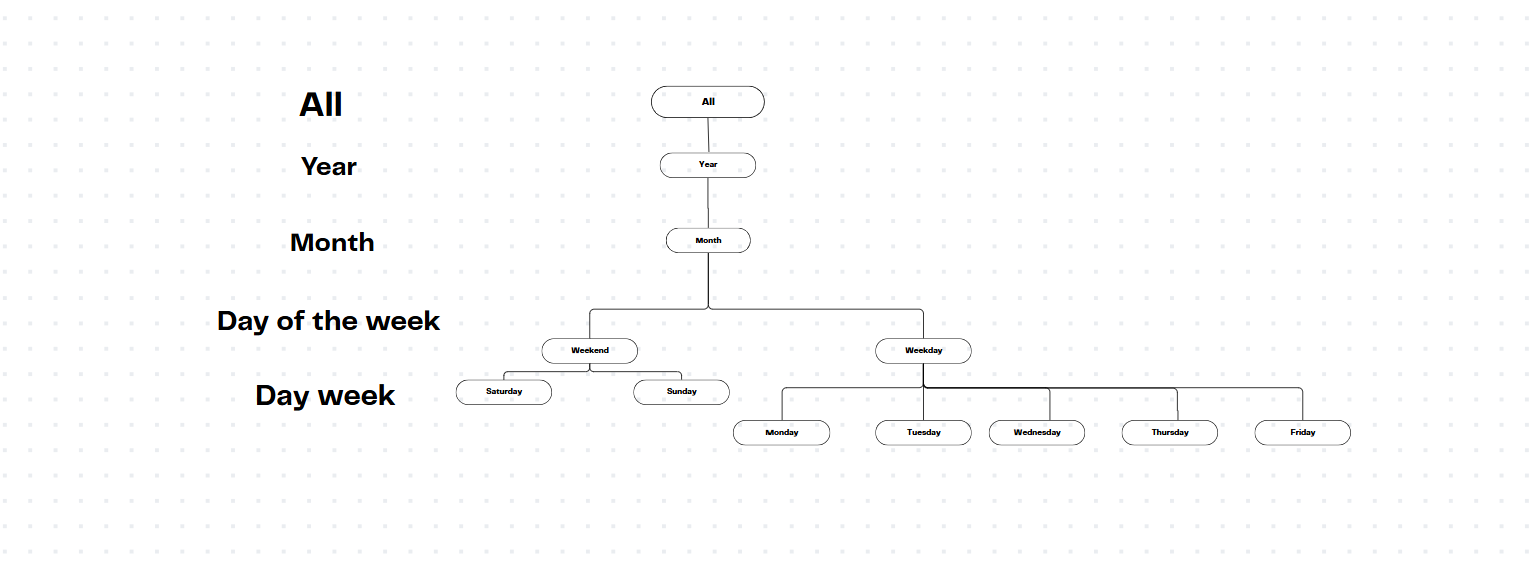


The Date dimension is essential for organizing the fatal crash data across different time intervals. This dimension enables analysts to explore temporal patterns in crash occurrences and fatalities—crucial.
This dimension is structured with multiple hierarchical levels:

Year: to analyze annual trends and changes in crash patterns.

Month: to observe seasonal variations and monthly peaks in crash frequency.

Day of Week: to distinguish weekday versus weekend crash behavior.

DayWeek: To identify which day of the week crashes happen to investigate crash behaviour.

Fatal crash analysis benefits from a more granular temporal breakdown. Therefore, this dimension retains all levels of temporal detail to support both high-level summaries and fine-grained analysis.

This layered approach to time supports a wide variety of business queries—such as whether weekend night crashes are deadlier, or if holiday periods experience spikes in fatalities. By doing so, the Date dimension enhances the analytical power of the data warehouse, enabling better-informed decisions for road safety improvements,this decision streamlines our data model and concentrates the analyis of daily patterns and results 



#### Geography dimension 
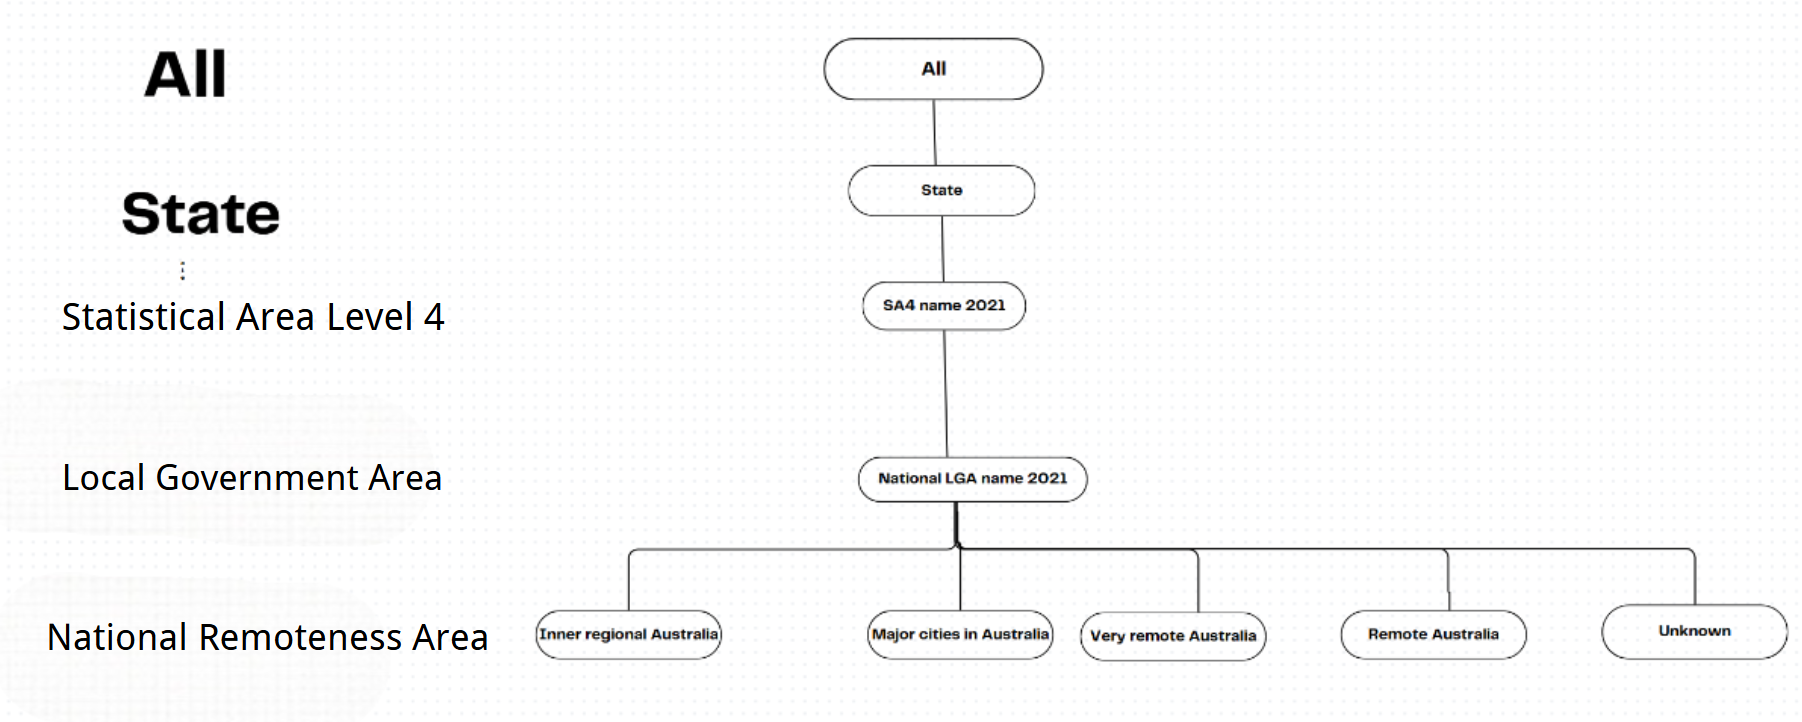


The Geography dimension provides a spatial context to each fatal crash by capturing detailed regional classification. It allows users to analyze crash and fatality patterns based on physical location, administrative boundaries, and degrees of remoteness.

This dimension is structured to support multi-level geographic analysis:

State: The top-level administrative division (e.g., NSW, VIC, QLD).

SA4 Name (Statistical Area Level 4): A standardized regional classification used by the Australian Bureau of Statistics for broad regional analysis.

LGA Name (Local Government Area): A more granular location detail used to pinpoint crash locations within local government boundaries.

National Remoteness Areas: A classification reflecting the accessibility and remoteness of areas, including categories such as Major Cities, Inner Regional, Outer Regional, Remote, and Very Remote.

This dimension enables the exploration of questions such as:

Are fatal crashes more common in remote regions than in major cities?

Which LGAs have consistently high crash fatality rates?

How do crash types differ between urban and rural areas?

By incorporating both administrative and accessibility-based classifications, the Geography dimension supports both policy-level regional insights and localized safety analysis, making it a vital component in identifying spatial disparities in road safety outcomes.

#### Crash dimension

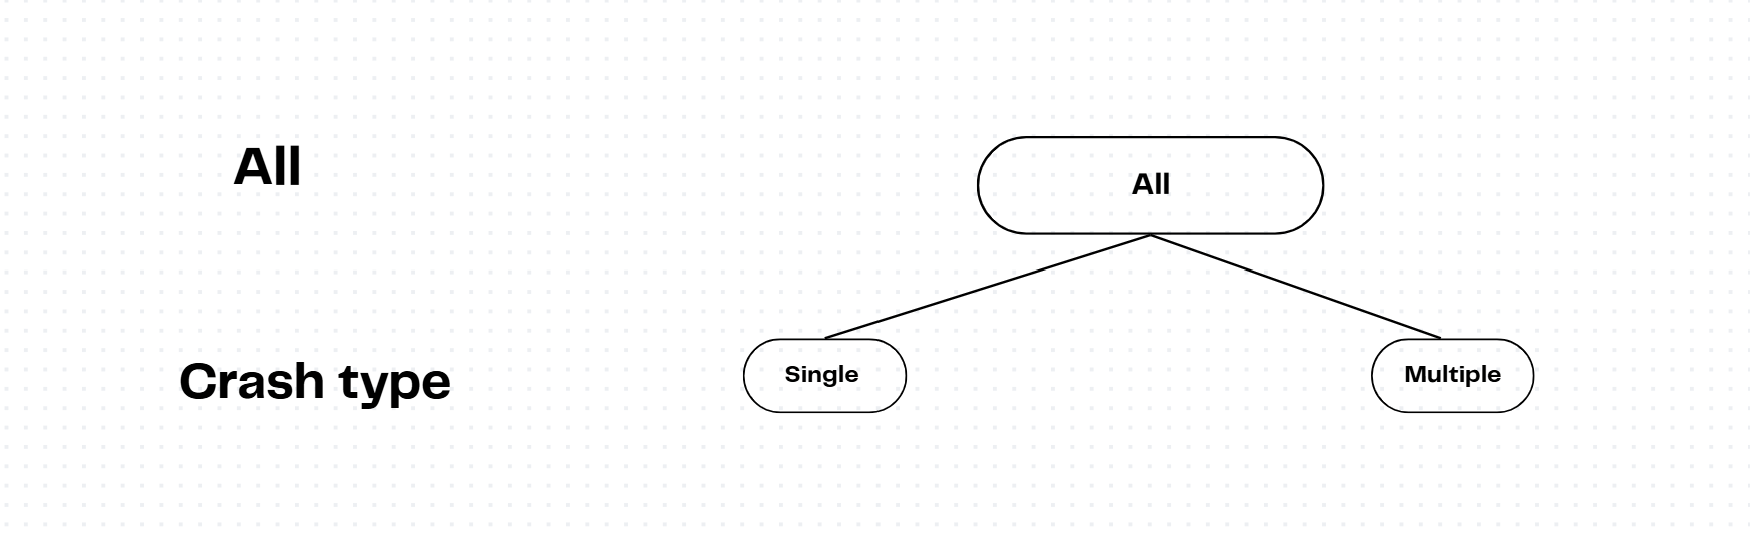

The Crash dimension describes the structural and contextual characteristics of each fatal crash. It enables the classification of crashes based on how they occurred and how many parties were involved, providing crucial input for analyzing crash dynamics and severity.

This dimension includes the following key attribute:

Crash Type: A categorical field that distinguishes between Single-vehicle crashes and Multiple-vehicle crashes.

Single: Involves only one vehicle (e.g., rollovers, run-offs).

Multiple: Involves two or more vehicles (e.g., collisions, pileups).

The Crash dimension supports business queries such as: What is the most common crash type across different states?Are multiple-vehicle crashes more common in urban areas than remote regions?Do younger drivers tend to be involved more in single or multiple crashes?

Because crash type plays a fundamental role in determining both cause and outcome, this dimension is especially valuable for policy makers, engineers, and law enforcement agencies. It helps identify high-risk crash scenarios and design appropriate prevention strategies,for example,barriers, speed zone adjustments, education campaigns.While the dimension is relatively simple, it integrates tightly with other dimensions like Vehicle, Road, and Geography, showing its analytical power when used in combination.

#### Vehicle dimension
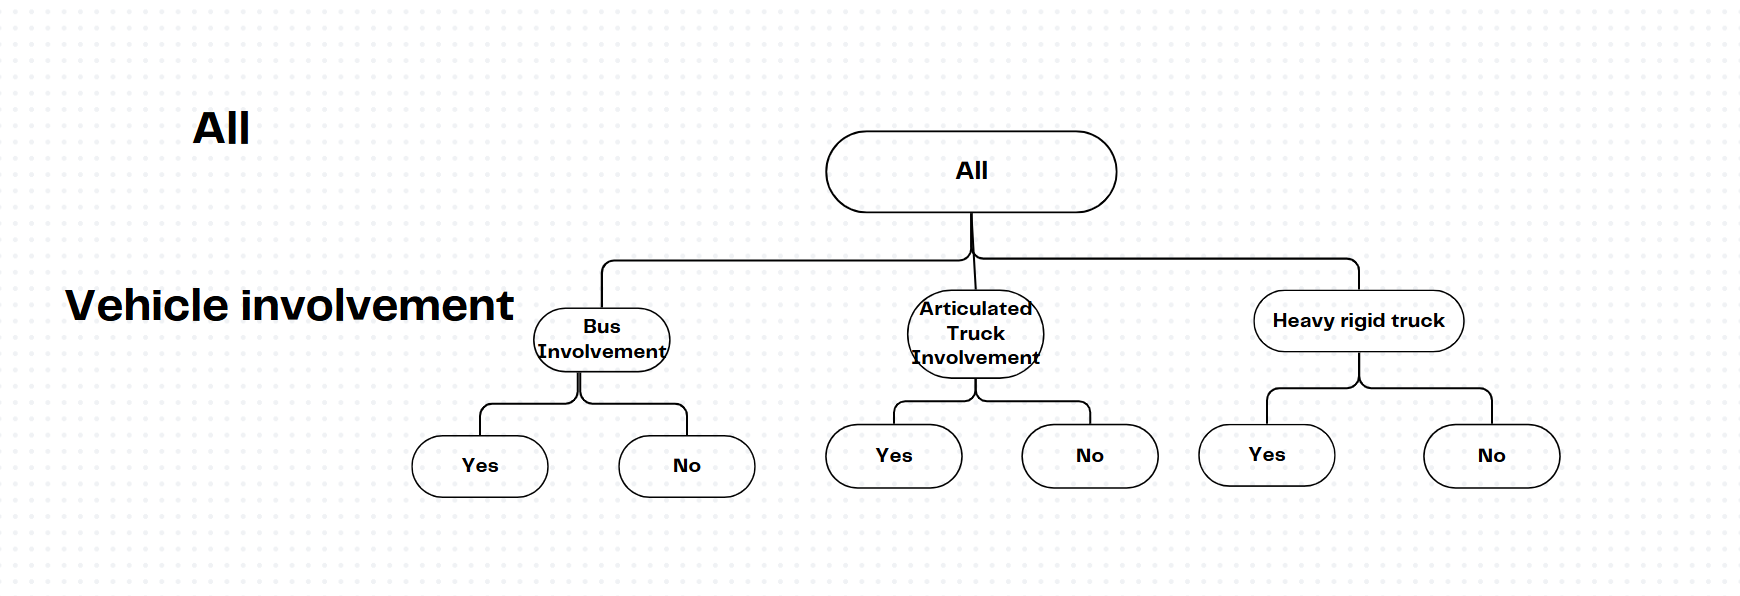

The Vehicle Dimension provides detailed contextual information regarding the types of vehicles involved in each crash event. This dimension is crucial for understanding the role that different vehicle categories play in fatal incidents and for supporting policy decisions related to transport safety and vehicle regulations.

This dimension captures three primary binary flags indicating the presence or absence of specific vehicle types:

Bus Involvement

Heavy Rigid Truck Involvement

Articulated Truck Involvement

Each flag uses a simple Yes/No classification, allowing for clear identification of whether a particular vehicle type was involved in a crash. These indicators are especially useful in conjunction with demographic or geographic dimensions to identify high-risk zones or population groups affected by heavy vehicle incidents.

Although this dimension does not follow a traditional hierarchical structure, its attributes are categorical and can be used in grouped aggregations or Boolean logic for multidimensional analysis. For example, users may define a custom grouping such as "Heavy Vehicle Involved" by combining flags for buses and trucks.

This dimension supports important business queries, such as:

Are crashes involving articulated trucks more frequent in remote regions?

Do young victims (under 25) have higher fatality rates in crashes involving heavy trucks or buses?

By analyzing this dimension, stakeholders such as road safety authorities, transportation planners, and policymakers can gain actionable insights into vehicle-related risk factors and improve vehicle safety strategies accordingly.

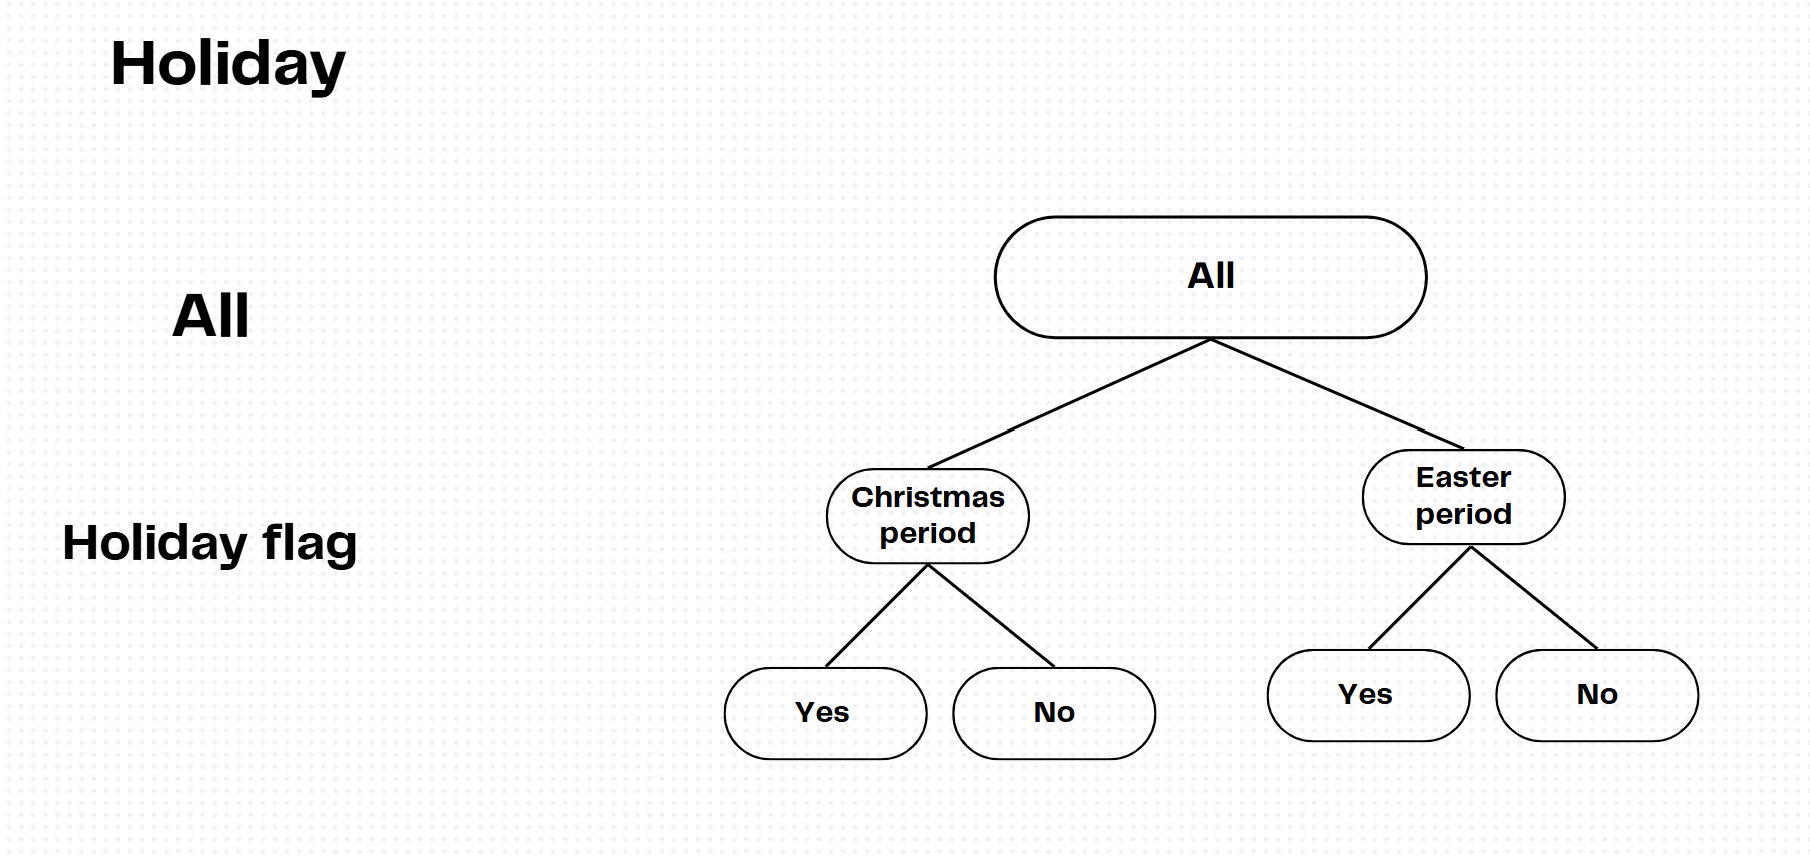

### Holiday Dimension Table (`dim_holiday`)

The **Holiday Dimension** captures whether a fatal crash occurred during a nationally significant holiday period, such as **Christmas** or **Easter**. This dimension helps assess the impact of holiday-related traffic volume, travel behavior, and associated risks on road fatalities.

- **Primary Key**: `HolidayID`  
- **Non-numeric data**:
  - `Christmas Period` (Yes / No)
  - `Easter Period` (Yes / No)

Each holiday period is represented using boolean fields, indicating if a given crash date falls within the specified time window. This setup allows analysts to compare crash rates during holidays versus non-holiday periods.

This dimension is particularly useful for policy makers and transport authorities to evaluate:
- Whether additional enforcement or awareness campaigns are needed during holidays.
- How crash patterns differ around national travel periods.


### Time Dimension Table (`dim_time`)

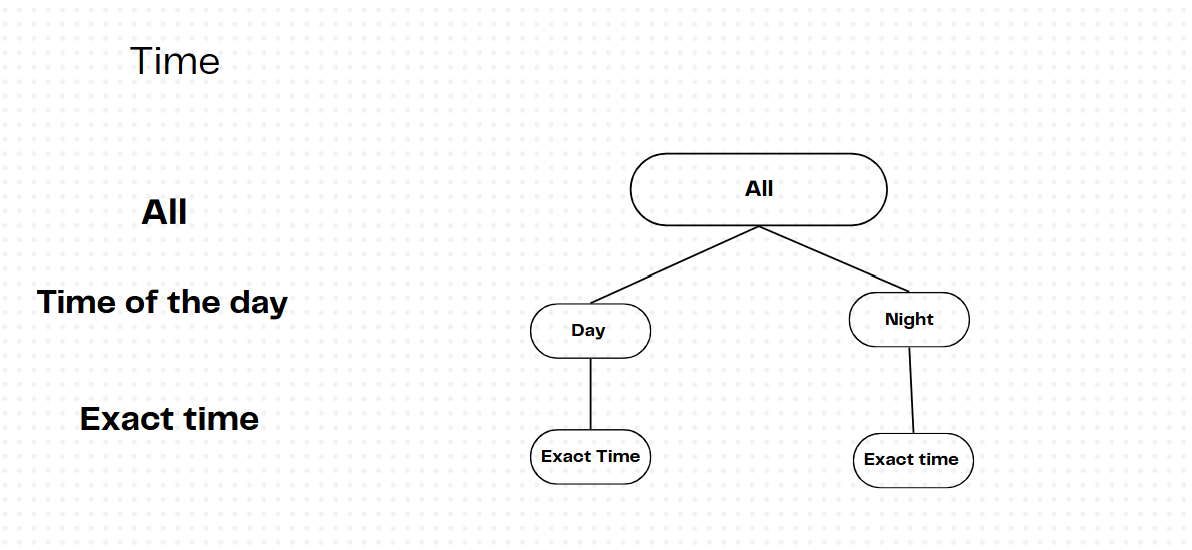

The **Time Dimension** provides detailed temporal context beyond just the date of the crash. It classifies crashes based on the **exact time** and the **part of the day** during which they occurred (e.g., Morning, Afternoon, Evening, Late Night).

- **Primary Key**: `TimeID`  
- **Non-numeric data**:
  - `Time` (Exact time, e.g., "23:45")
  - `Time of Day` (e.g., Morning, Afternoon, Evening, Late Night)

This dimension supports queries that explore whether certain time periods are more dangerous than others. For example:
- Are late-night crashes more likely to involve young victims?
- Is there a higher rate of fatalities during evening rush hour?

By enabling time-of-day analysis, the dimension contributes significantly to traffic planning, lighting infrastructure decisions, and time-targeted safety campaigns.


#### b. StarNet Model
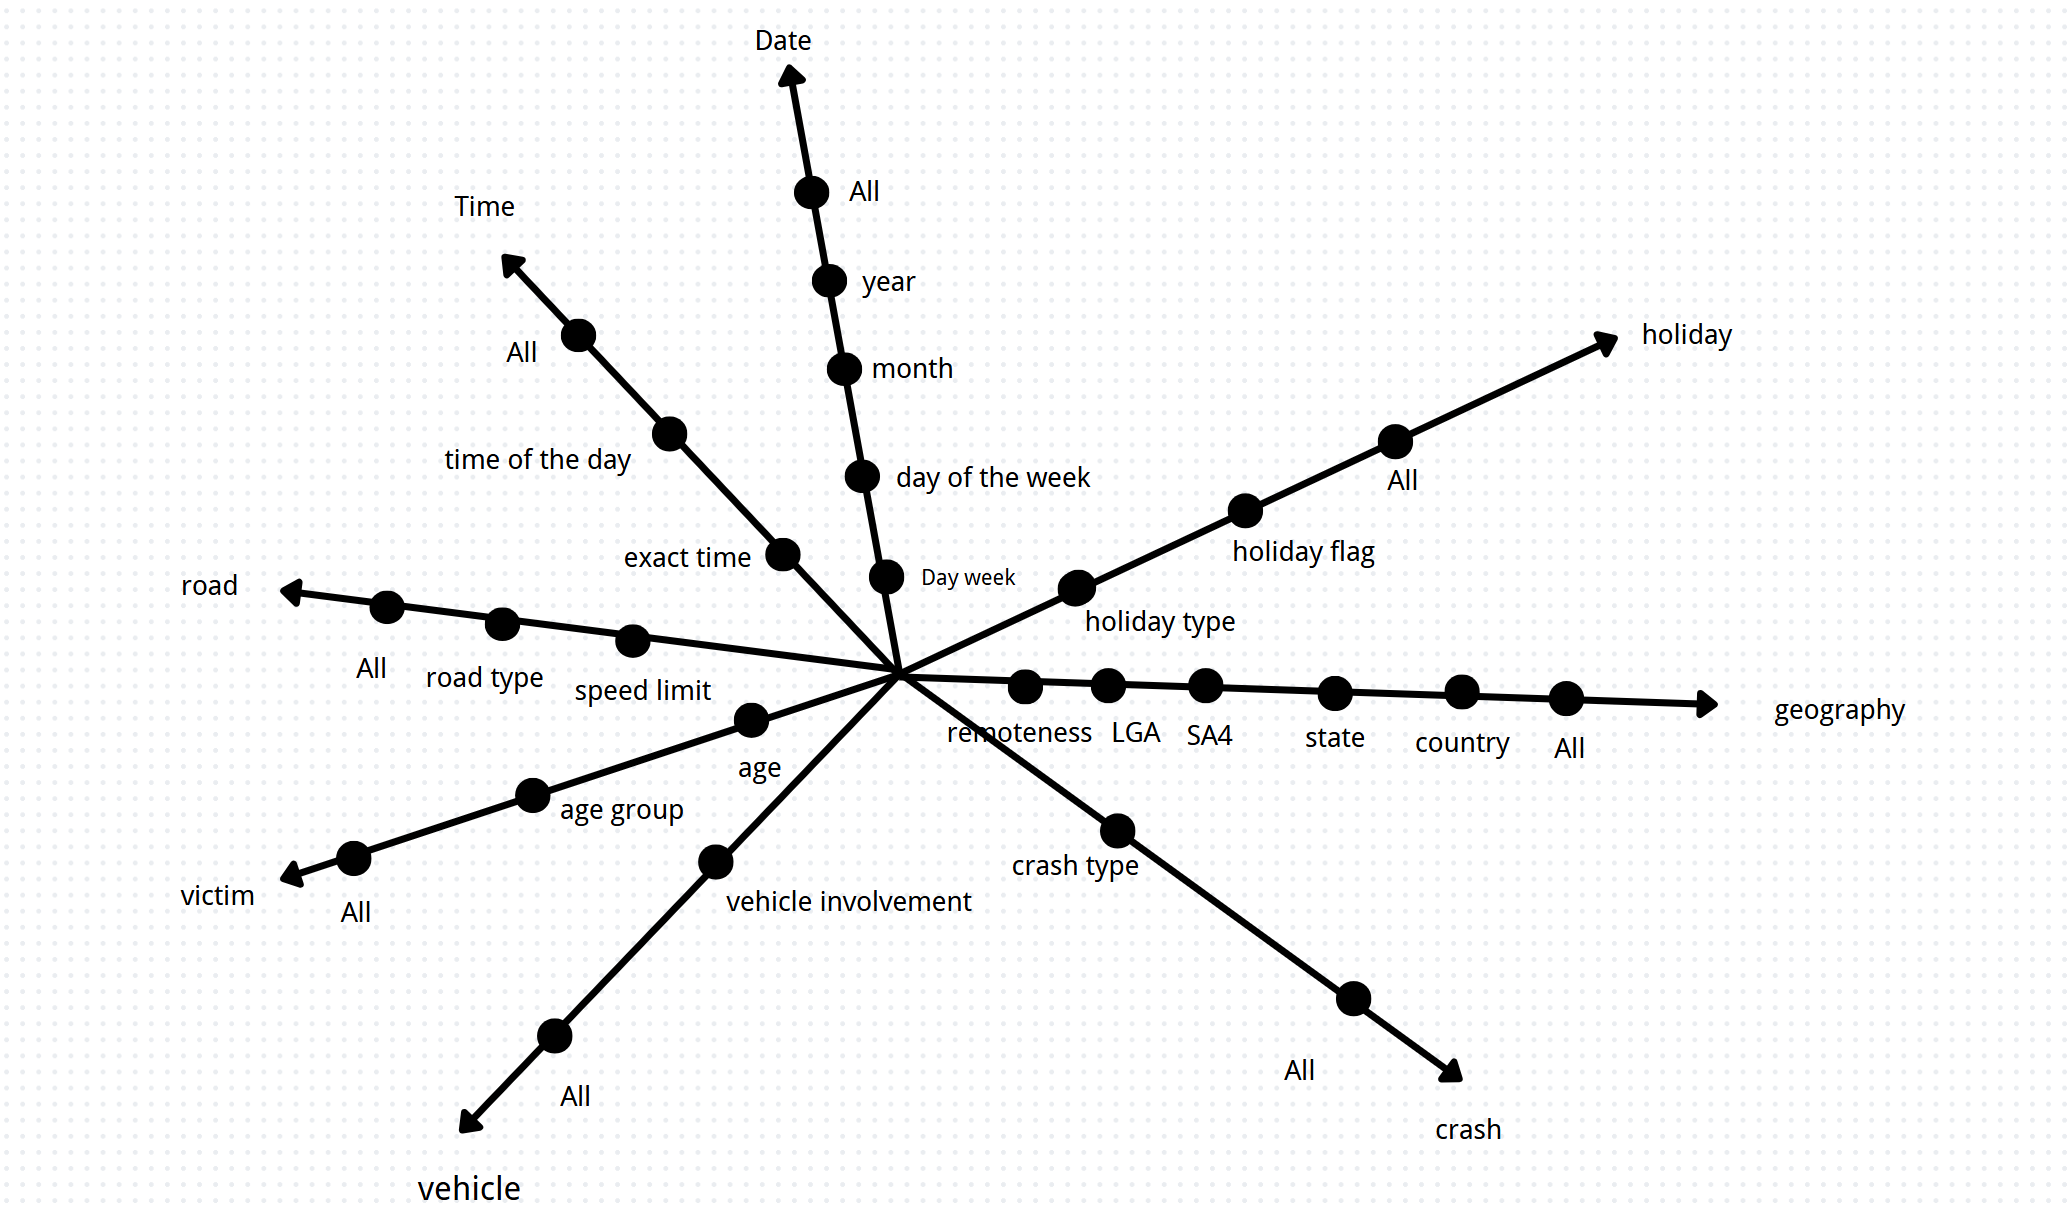


All the concept hierarchies are then combined to build a multidimensional StarNet Model for our data warehouse, enabling us to understand the various combinations of dimensions that can be used for analysis. By representing the concept hierarchies in this structured visual format, we provide a clear framework for supporting multi-dimensional queries, enabling stakeholders to derive insights from a wide variety of analytical angles.

The StarNet Diagram of our data warehouse integrates eight key dimensions: Date, Time, Road, Crash, Geography, Vehicle, Victim, and Holiday. These dimensions serve as the backbone of our analytical capabilities, allowing flexible drill-down and roll-up operations for both high-level summary and detailed incident analysis.

The Date dimension enables analysis over years, months, and days of the week.

The Time dimension captures the exact time and general time-of-day of incidents.

The Road dimension combines road user roles, road types, and speed limits to assess infrastructure and behavioral risks.

The Crash dimension focuses on crash types and characteristics of the events.

The Geography dimension includes detailed location data such as LGA, SA4, state, and remoteness levels.

The Vehicle dimension evaluates vehicle involvement, particularly with heavy and public transport.

The Victim dimension includes age, age group, and gender details of individuals involved.

The Holiday dimension provides flags and types for public holidays, allowing seasonal pattern analysis.

Together, these dimensions provide a platform for supporting complex business queries from transport authorities. The StarNet design enables the data warehouse to deliver high-impact, actionable insights regarding fatal crashes across Australia.

#### c. Starnet footprints
As outlined in Part 1, our project is designed to construct a data warehouse that supports six business queries related to fatal crashes across Australia. In this section, we demonstrate how our StarNet model enables flexible and multidimensional analysis by visually representing the combination of concept hierarchies used to answer each business query. These StarNet Footprints show how various dimensions are traversed—at different levels of granularity—when retrieving insights from the data warehouse.

By connecting relevant dimensions such as victim demographics, vehicle involvement, road conditions, temporal factors, and geographic regions, our StarNet Footprints offer a clear and structured path for analysts and stakeholders to follow, ensuring that each query is supported by meaningful and targeted data intersections. This approach enhances transparency, interpretability, and efficiency in decision-making related to transport safety and policy evaluation.



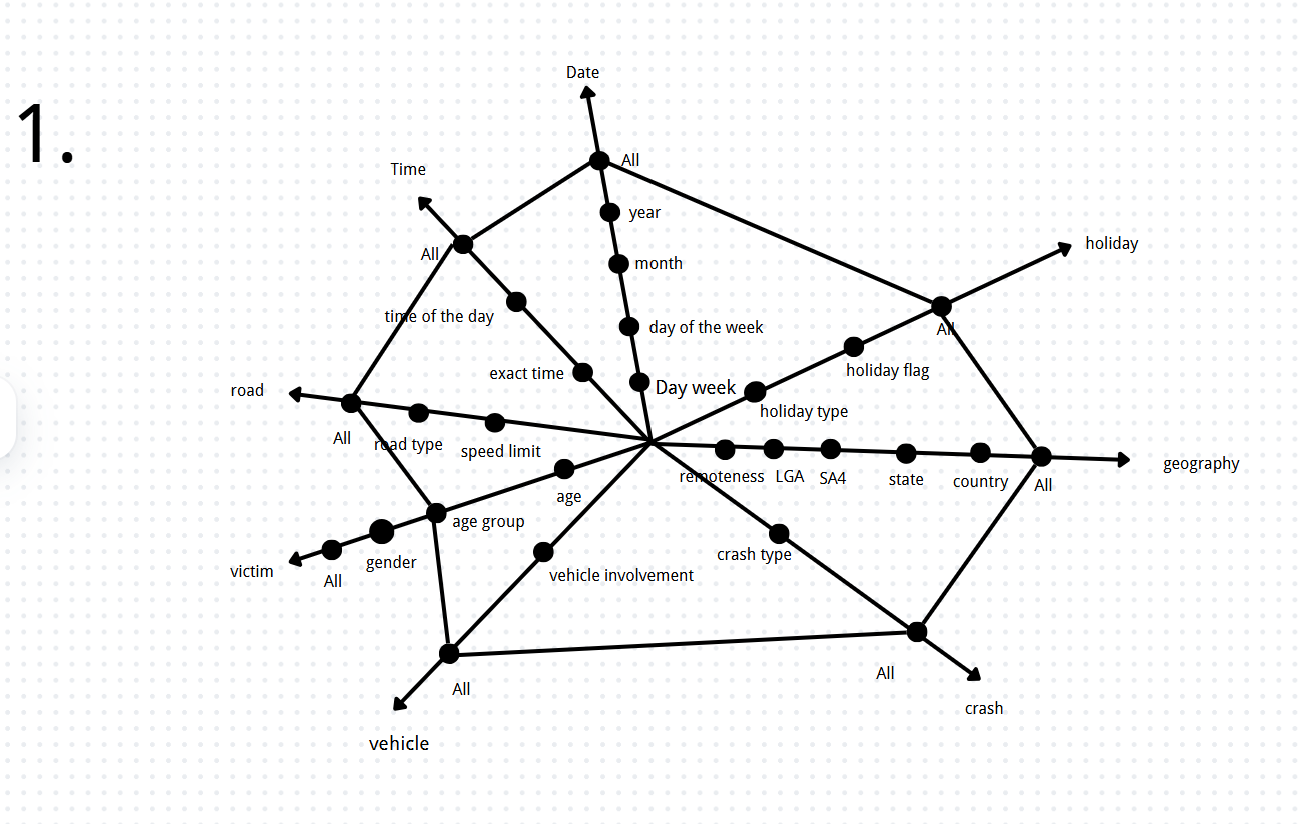
### 1. Business Query: What age group of victims is most likely to die in crashes?

This query explores which age groups are most vulnerable in fatal crashes, helping identify high-risk demographics.

- **Dimensions needed:** `dim_fatalities`, `fact_table`
- **Measures needed:** Number of Fatalities (count per age group)



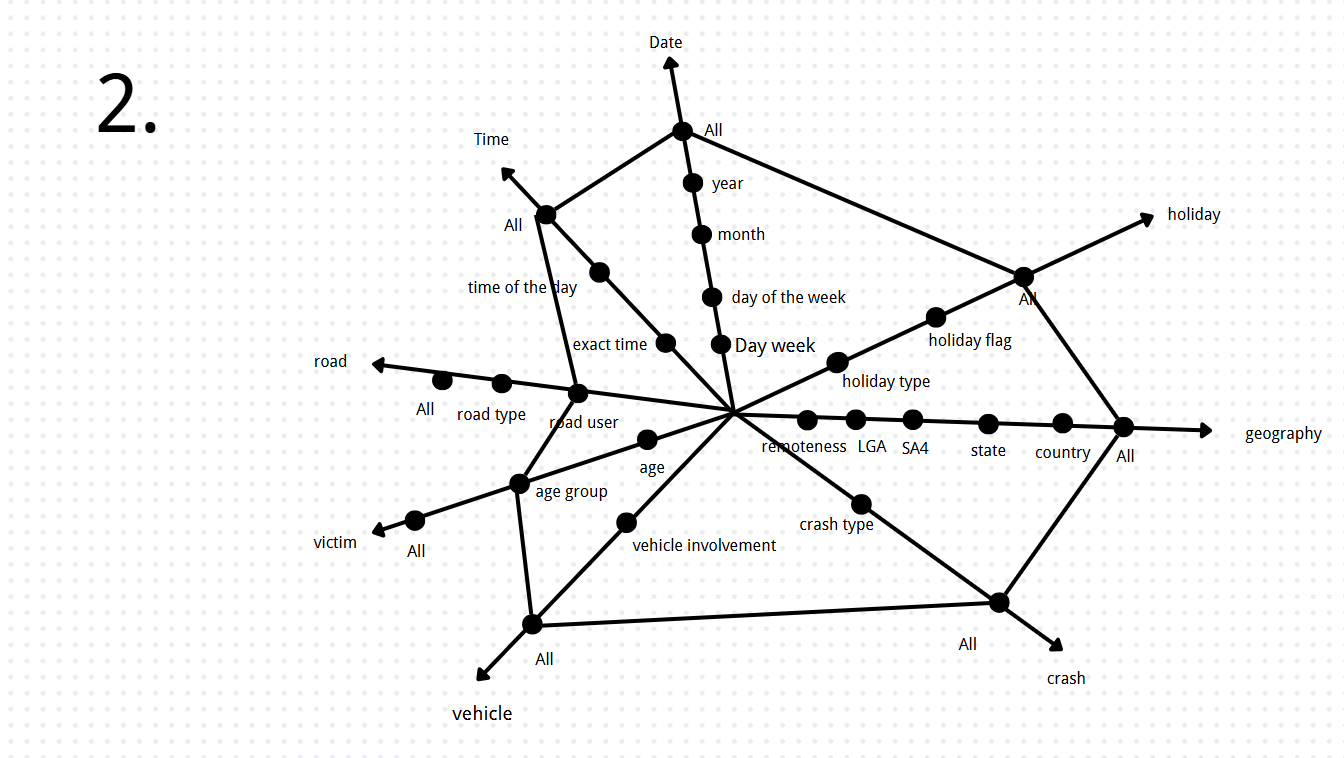
### 2. Business Query: Which road user type has the highest fatality rate on roads with speed limits > 80?

This query compares road user types (e.g., drivers, pedestrians) and their fatality rates on high-speed roads.

- **Dimensions needed:** `dim_road`, `dim_fatalities`, `fact_table`
- **Measures needed:** Number of Fatalities (filtered by speed > 80 km/h)



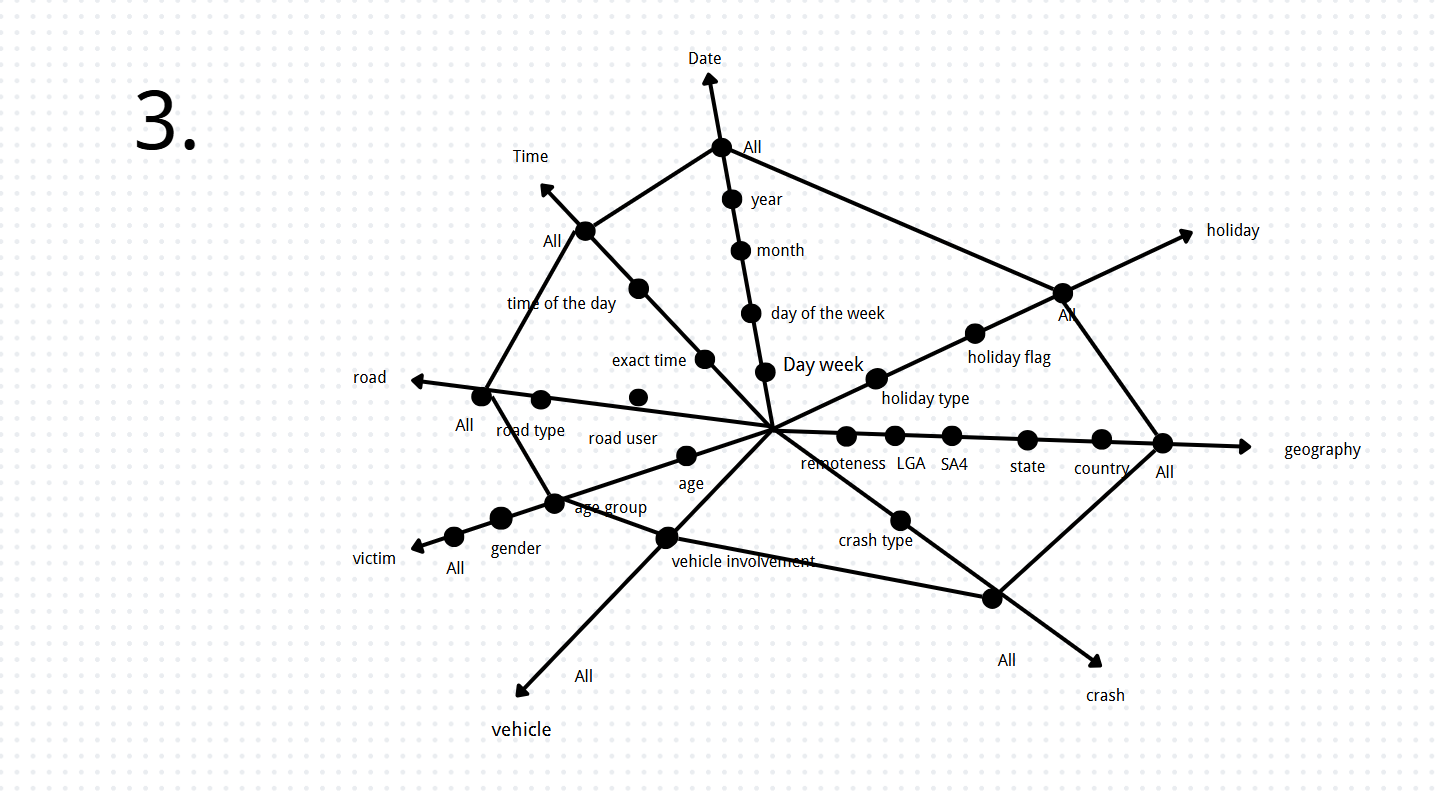
### 3. Business Query: Do younger victims (under 25) die more frequently in crashes involving buses/trucks?

This query identifies the correlation between victim age and the presence of heavy vehicles.

- **Dimensions needed:** `dim_fatalities`, `dim_vehicle`, `fact_table`
- **Measures needed:** Number of Fatalities among victims aged < 25



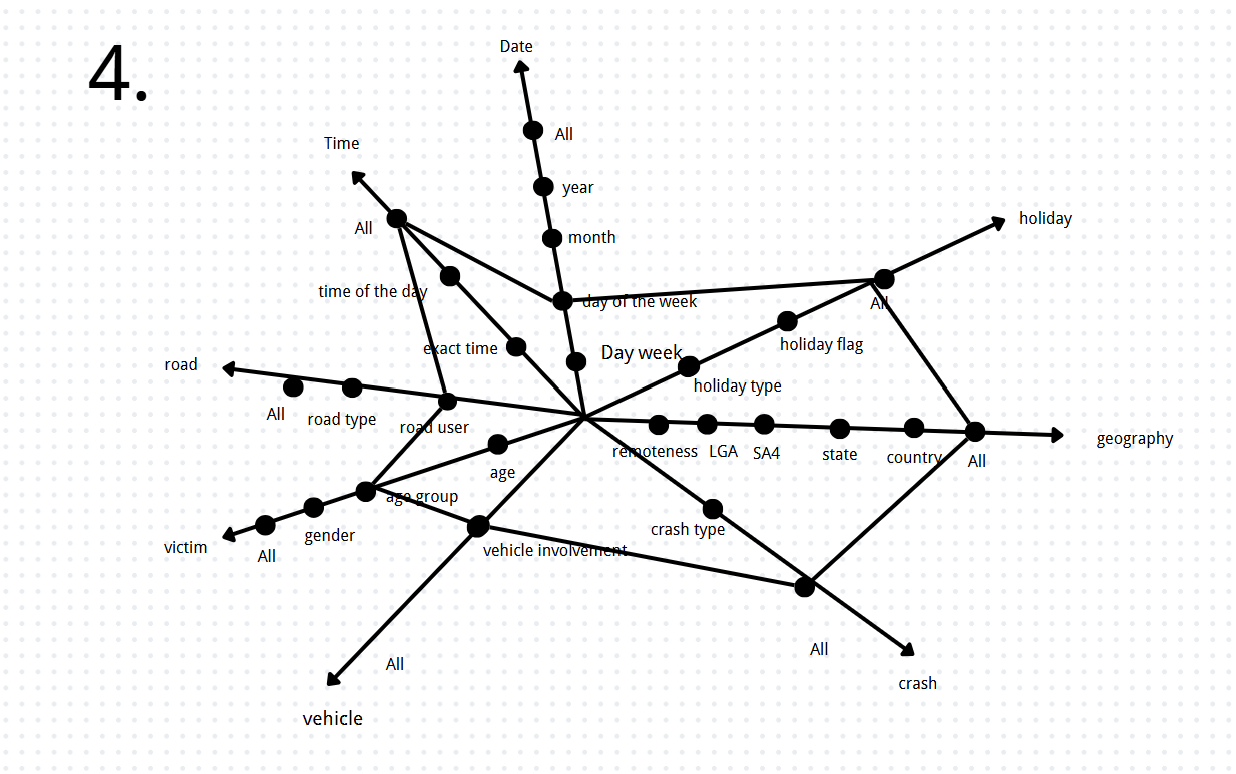
### 4. Business Query: Are weekend crashes more likely to result in fatalities among passengers vs drivers?

This query evaluates whether weekends are riskier for passengers compared to drivers.

- **Dimensions needed:** `dim_road`, `dim_date`, `dim_fatalities`, `fact_table`
- **Measures needed:** Number of Fatalities (grouped by road user & day type)


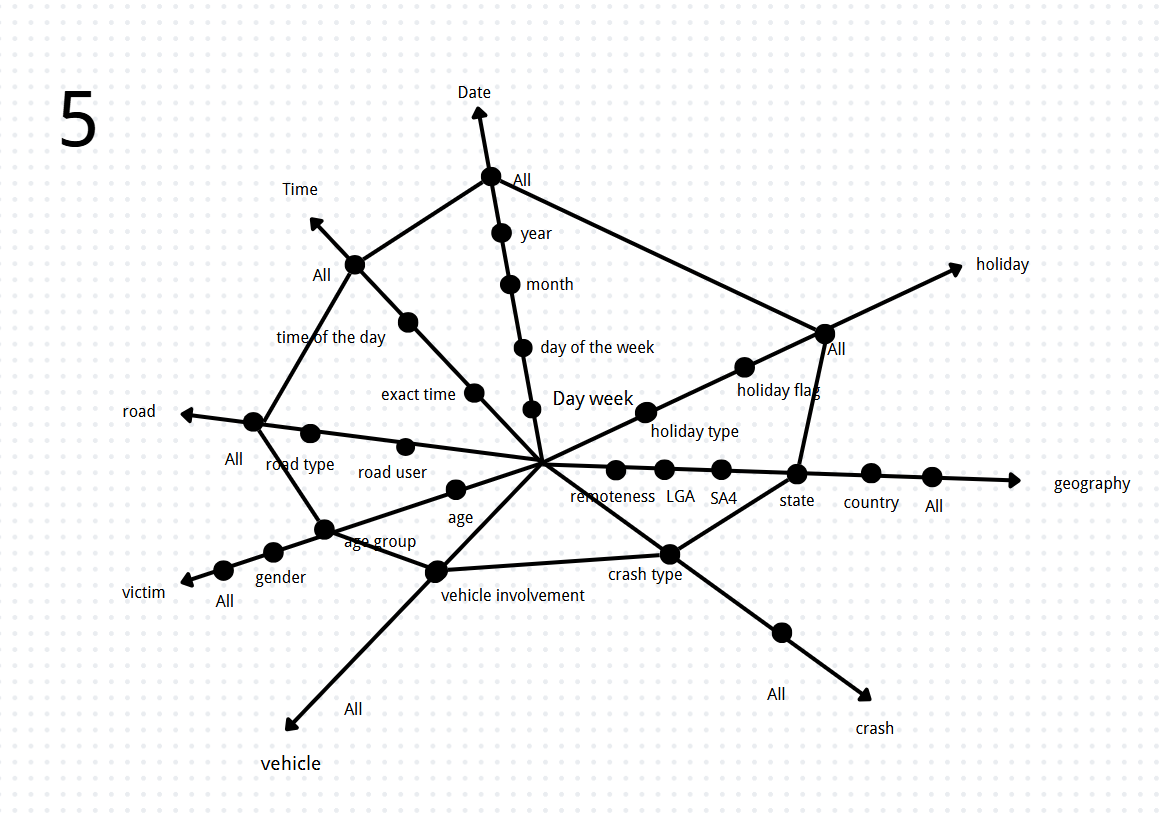
### 5. Business Query: What is the most common crash type in different states?

This query compares states based on their dominant crash type (single vs multiple vehicle).

- **Dimensions needed:** `dim_crash`, `dim_geography`, `fact_table`
- **Measures needed:** Number of Crashes by Crash Type per State



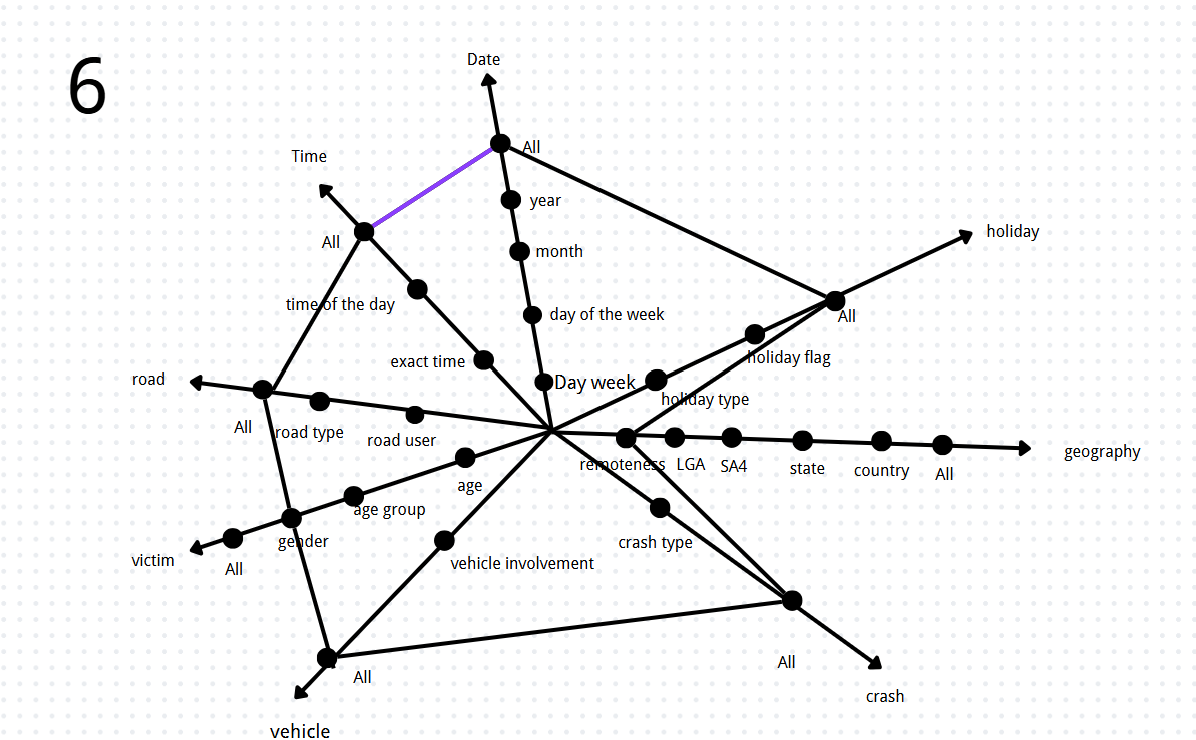
### 6. Business Query: Is there gender disparity in crash fatalities across remoteness or regions?

This query investigates whether male or female fatalities vary based on location types.

- **Dimensions needed:** `dim_fatalities`, `dim_geography`, `fact_table`
- **Measures needed:** Number of Fatalities by Gender & Remoteness




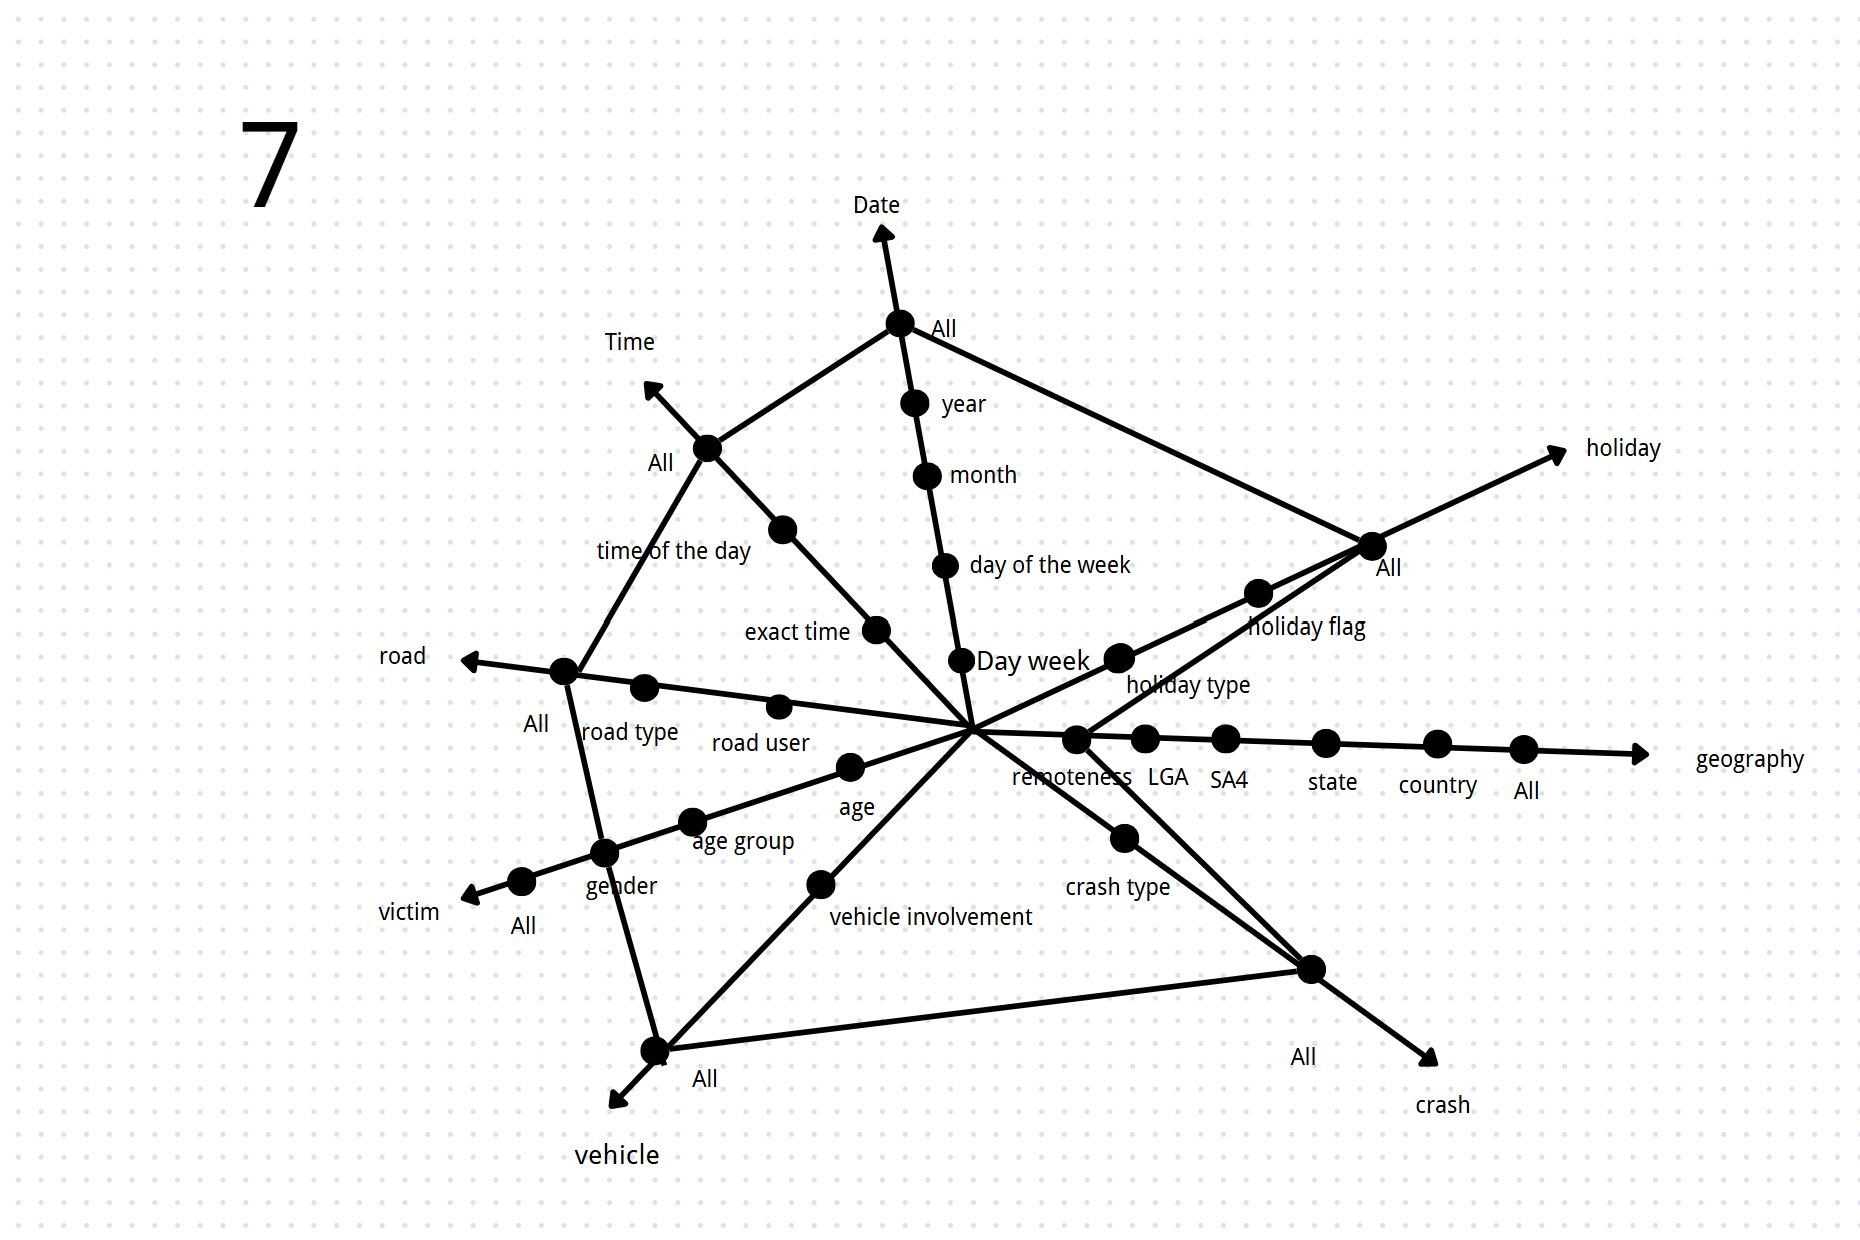

### 7. Business Query: Which very remote LGAs have high fatality counts (30–96)?

This query pinpoints remote LGAs (Local Government Areas) with the highest fatality burdens.

- **Dimensions needed:** `dim_geography`, `fact_table`
- **Measures needed:** Number of Fatalities in each LGA




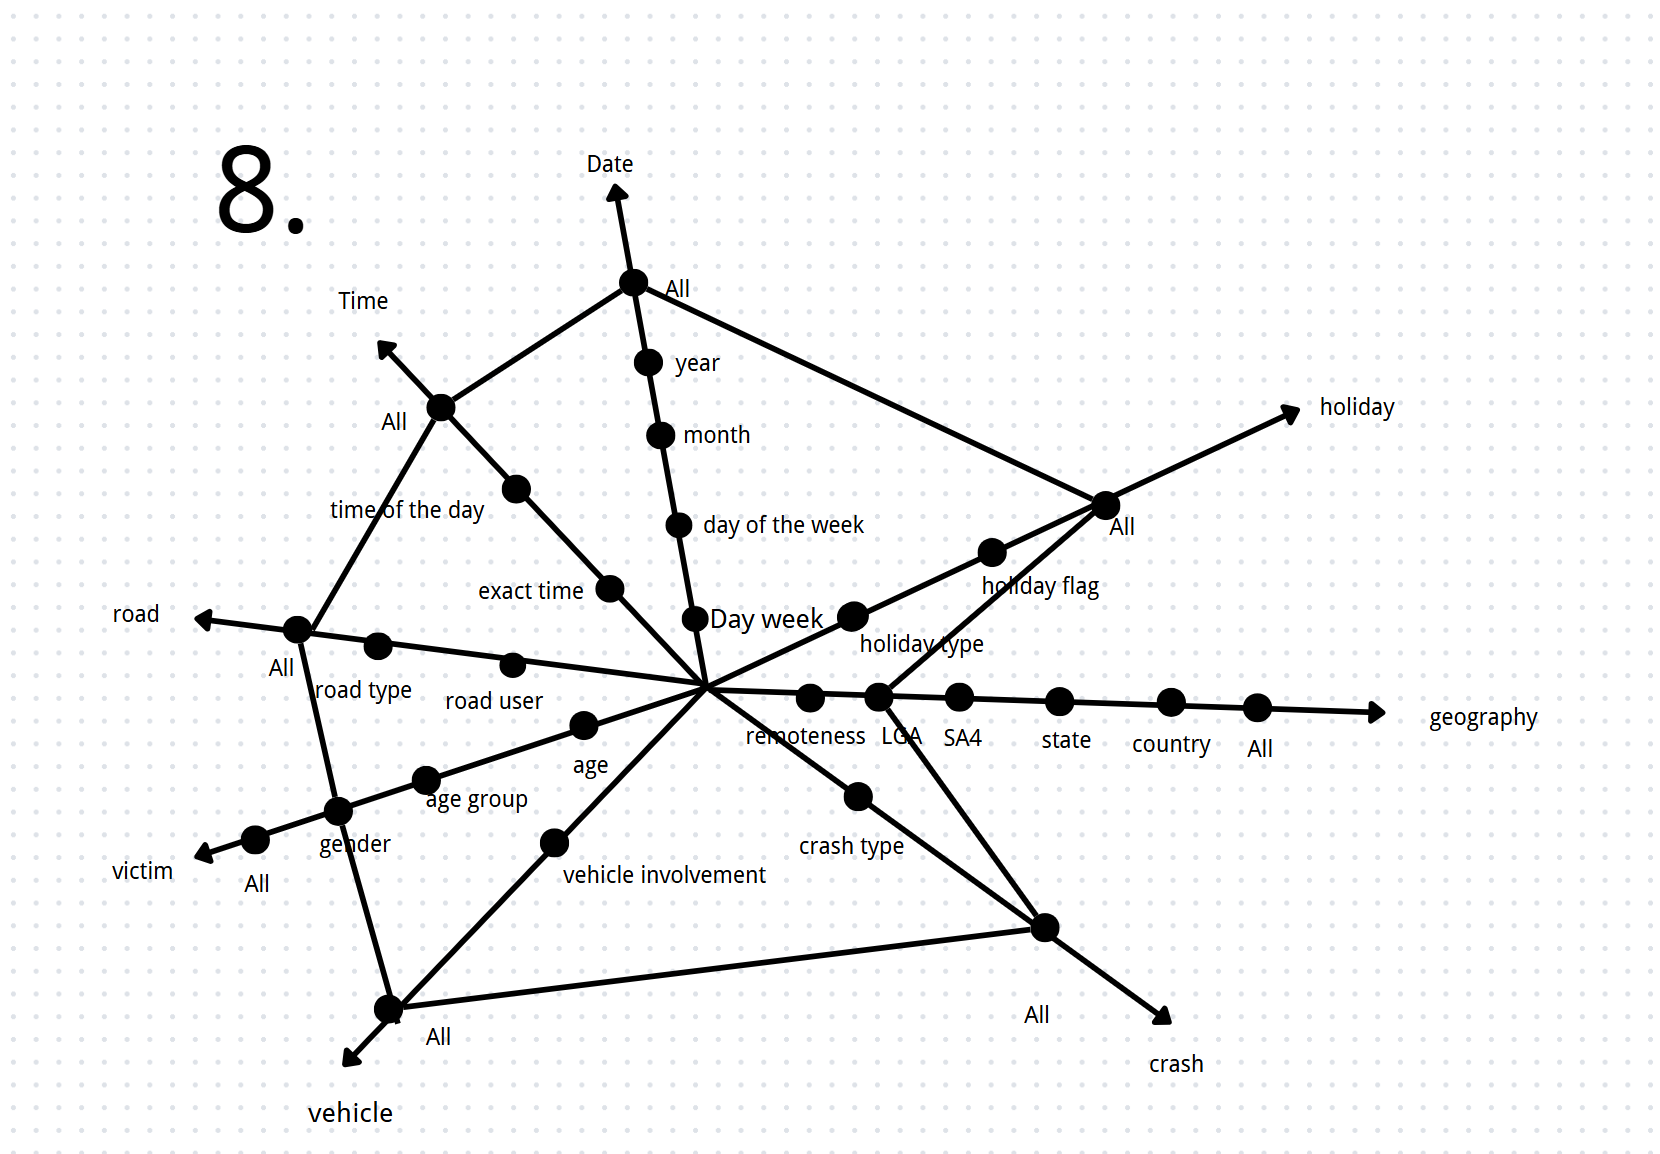
### 8. Business Query: Which LGA has the highest total number of fatalities?

This query identifies the single LGA with the most recorded fatalities.

- **Dimensions needed:** `dim_geography`, `fact_table`
- **Measures needed:** Total Number of Fatalities per LGA

---



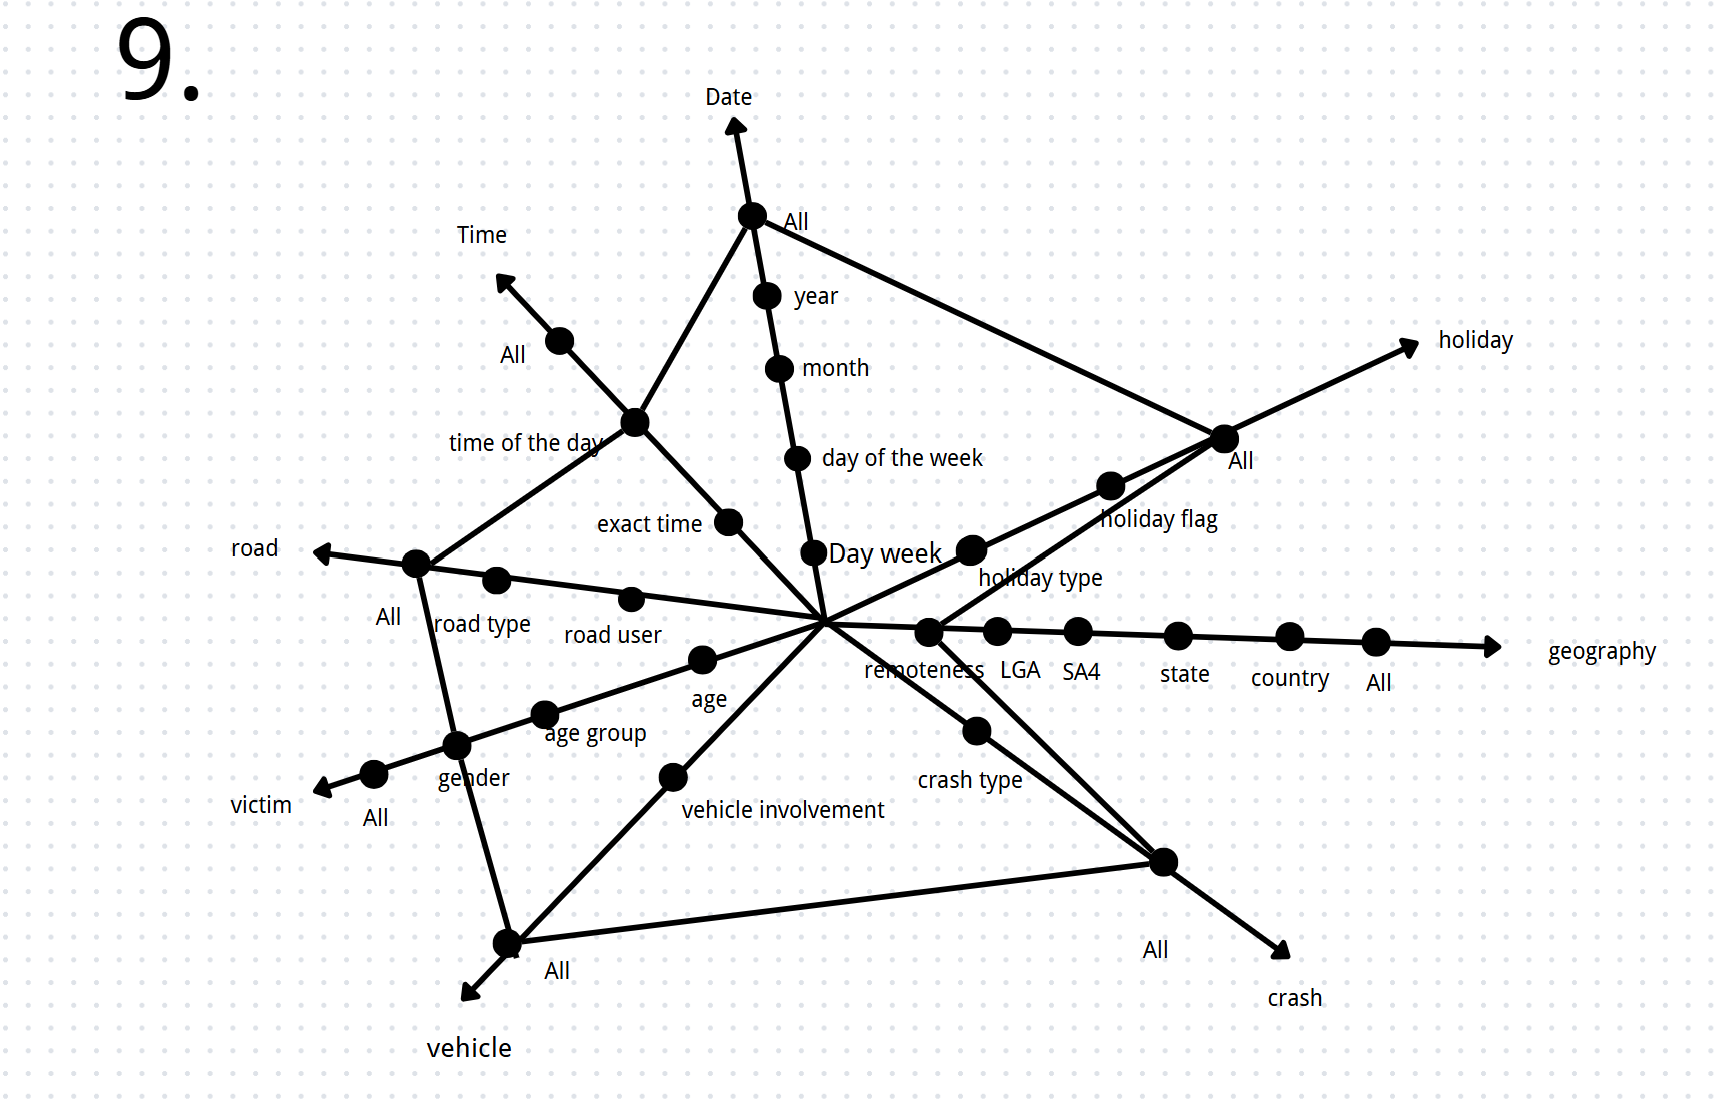
### 9. Business Query: Where are the night-time fatalities in remote areas with speed ≥ 80 km/h?

This query filters fatal crashes by time, remoteness, and speed conditions.

- **Dimensions needed:** `dim_time`, `dim_geography`, `dim_road`, `fact_table`
- **Measures needed:** Number of Fatalities (filtered by night-time, remoteness, speed)





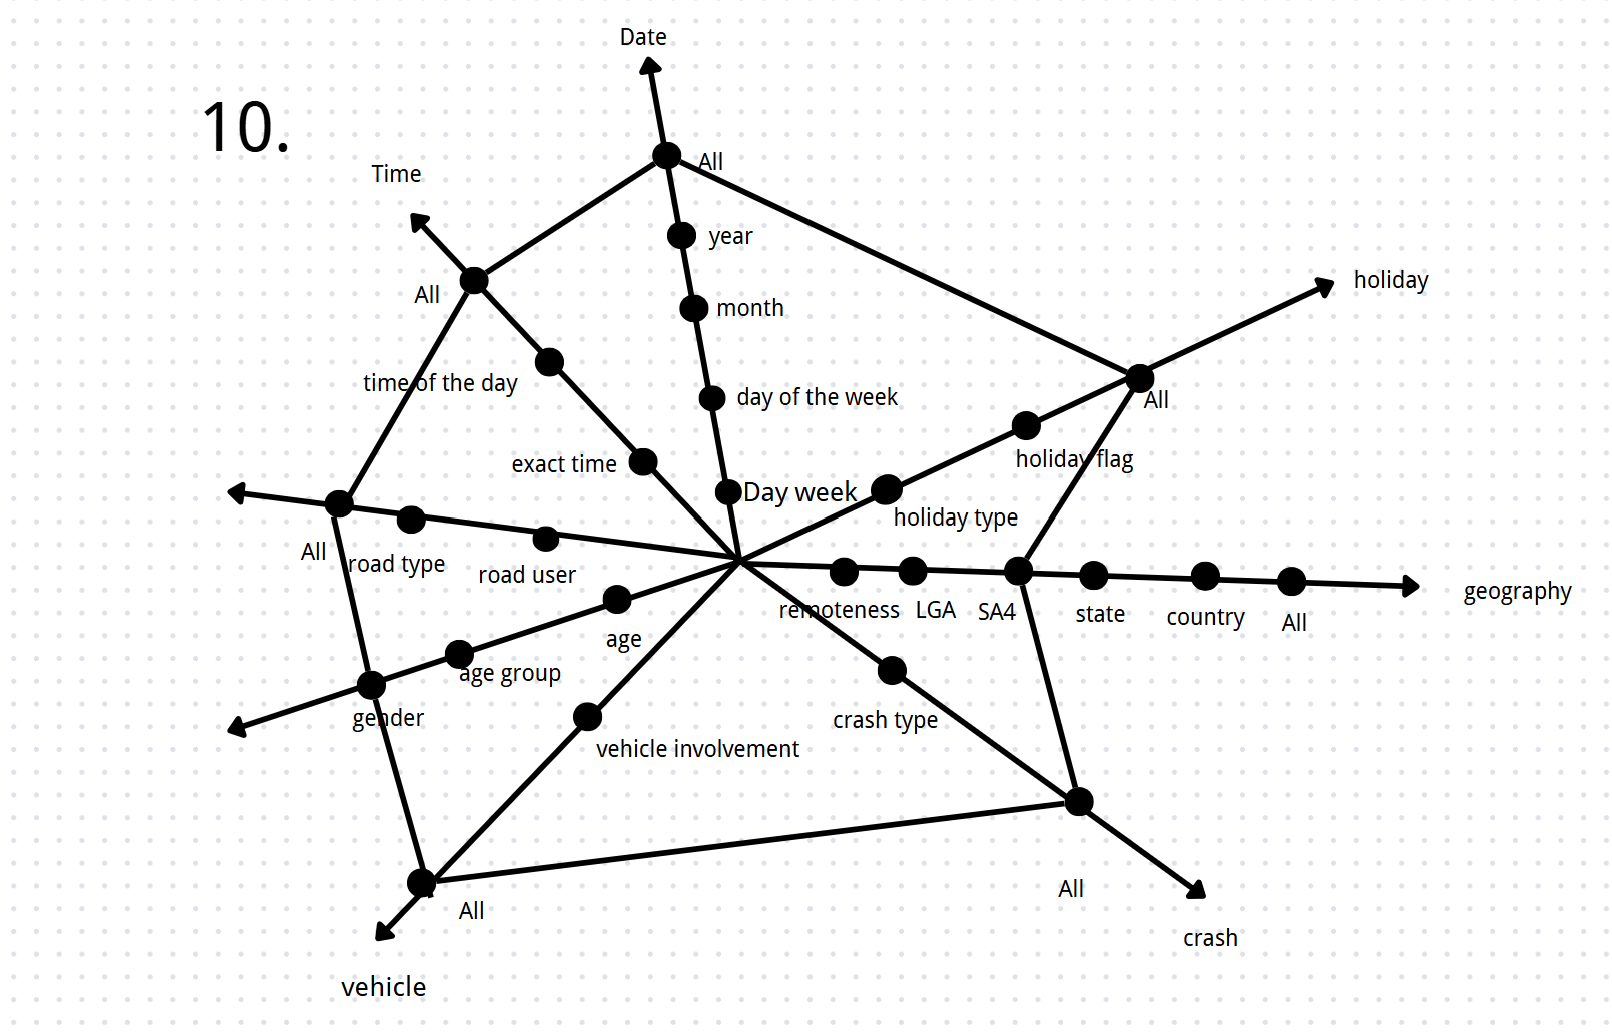
### 10. Business Query: Which LGA has the most fatalities in each SA4 region?

This query groups LGAs by their SA4 regions to determine localized fatality leaders.

- **Dimensions needed:** `dim_geography`, `fact_table`
- **Measures needed:** Number of Fatalities grouped by SA4 and LGA



## PART 4: Star Schema for Data Warehouse Design

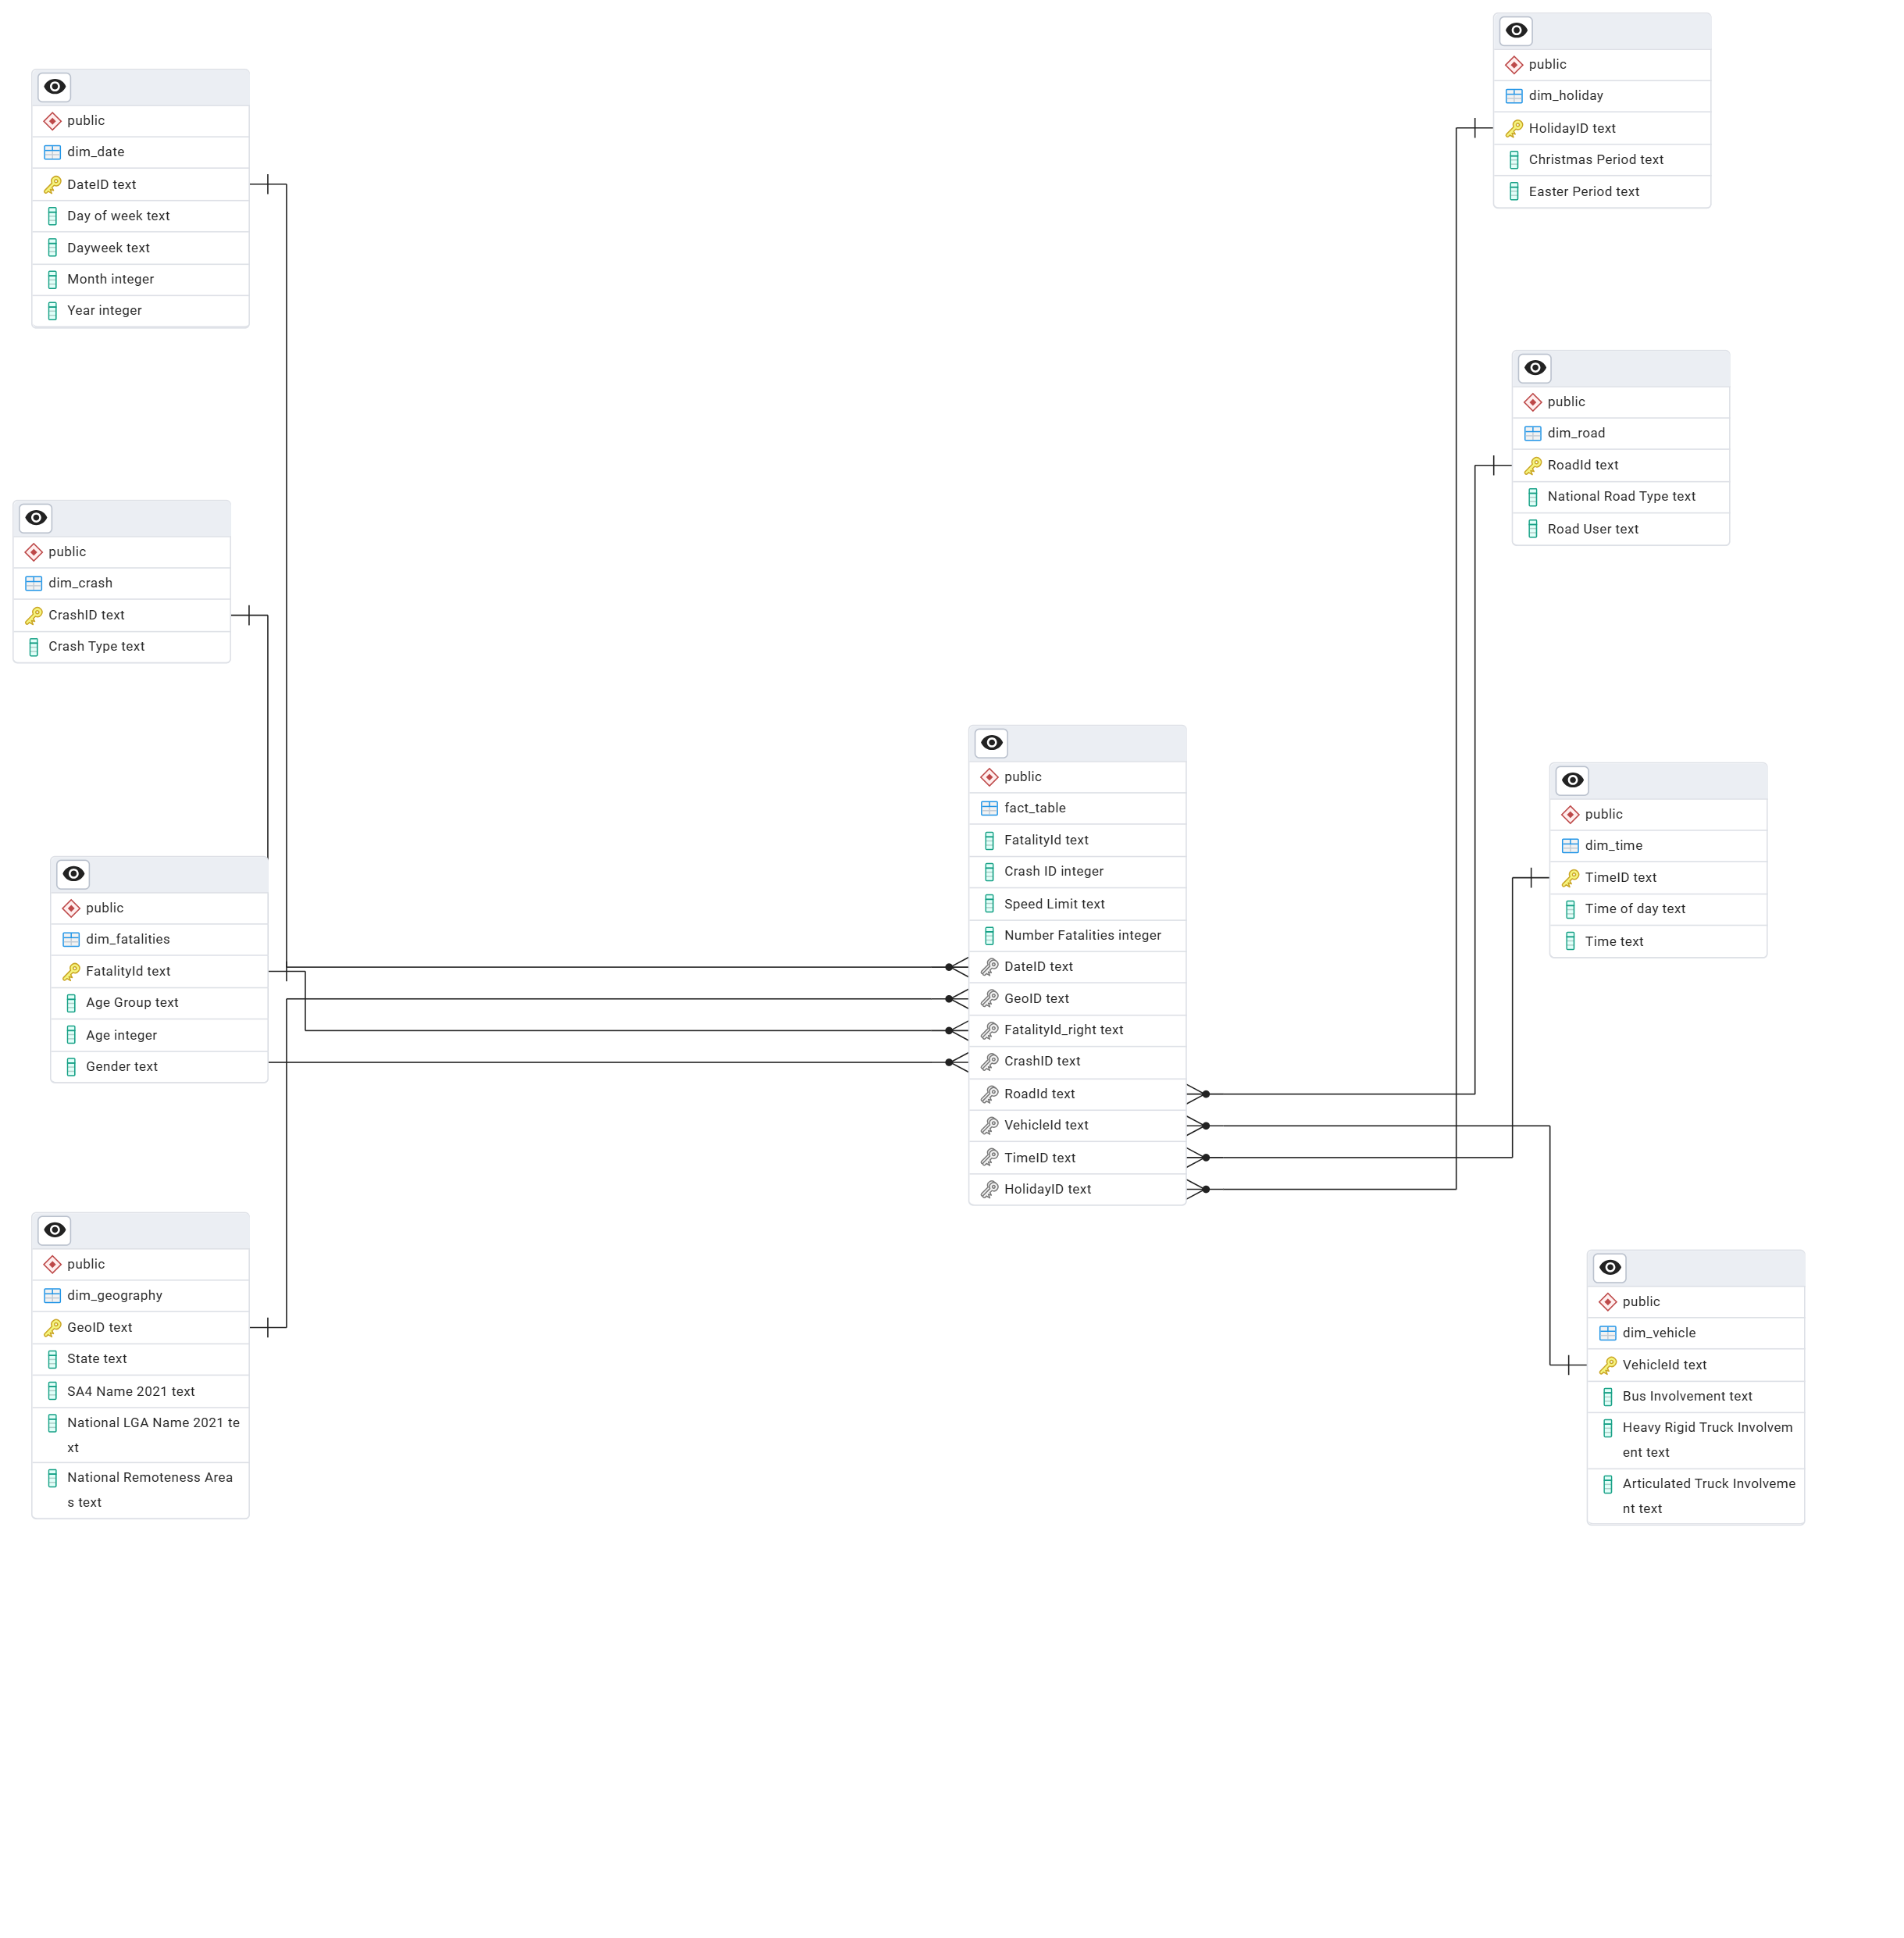

Our data warehouse adopts a Star Schema design, a widely recognized structure where a central fact table is surrounded by and connected to multiple dimension tables. This architecture simplifies complex queries and enhances performance by clearly separating analytical measures from descriptive context.

As shown below, the fact_table in the center captures the key measurable event—fatal crashes—with each row representing a unique fatality incident. This central table is linked to eight dimension tables, each providing detailed contextual information that supports multi-dimensional analysis. The design aligns with our StarNet model and enables seamless aggregation, filtering, and drilling down based on user queries.


## **a. Fact Table (`fact_table`)**

Each row in the fact table represents a unique fatal crash incident involving one or more fatalities. The table links to multiple dimension tables through foreign keys, enabling multi-perspective analysis on factors such as time, location, vehicle involvement, road conditions, and victim demographics.

The fact table is designed to support detailed and efficient querying for analytical tasks, such as identifying high-risk groups, crash patterns, and geographical crash hotspots. The **grain** of this fact table is **one record per fatality**.


### **1) Primary Key**
- `FatalityId`: uniquely identifies each fatality entry.


### **2) Foreign Keys (linking to Dimension Tables)**
- `CrashID`: links to the **Crash Dimension**
- `DateID`: links to the **Date Dimension**
- `TimeID`: links to the **Time Dimension**
- `GeoID`: links to the **Geography Dimension**
- `RoadId`: links to the **Road Dimension**
- `HolidayID`: links to the **Holiday Dimension**
- `VehicleId`: links to the **Vehicle Dimension**


### **3) Numeric Measures**
- `Speed Limit`: speed limit at the crash location  
- `Number Fatalities`: number of fatalities recorded for the crash  


4) Efficiency Measures for Dashboard Visualization
To improve dashboard performance and analytical value in Tableau, weighted or pre-aggregated measures may be implemented (if applicable):

"Total_Fatalities_by_Road_Type"

"Fatalities_per_Crash_Type"

"Fatalities_per_Age_Group"

"Fatalities_by_Remoteness_Level"

These support insightful comparisons and trend tracking over road types, time, demographics, and regions.（需要改动）

## **b. Dimension Tables**

In alignment with the concept hierarchies described in PART 3, each dimension table is structured to show all levels within its corresponding dimension. They also contain a primary key that facilitates linkage of dimension data to the fact table.


### 1. **Date Dimension Table (`dim_date`)**
- **Primary key:** `DateID`  
- **Non-numeric data:**
  - `Year` (level: Year)  
  - `Month` (level: Month)  
  - `Dayweek` (level: Day of the Week)


### 2. **Time Dimension Table (`dim_time`)**
- **Primary key:** `TimeID`  
- **Non-numeric data:**
  - `Time` (level: Exact Time)  
  - `Time of day` (level: Time of Day)


### 3. **Fatalities Dimension Table (`dim_fatalities`)**
- **Primary key:** `FatalityId`  
- **Non-numeric data:**
  - `Age Group` (level: Age Group)  
  - `Age` (level: Age)  
  - `Gender` (level: Gender)


### 4. **Geography Dimension Table (`dim_geography`)**
- **Primary key:** `GeoID`  
- **Non-numeric data:**
  - `State` (level: State)  
  - `SA4 Name 2021` (level: SA4)  
  - `National LGA Name 2021` (level: LGA)  
  - `National Remoteness Area` (level: Remoteness)


### 5. **Road Dimension Table (`dim_road_df`)**
- **Primary key:** `RoadId`  
- **Non-numeric data:**
  - `National Road Type` (level: Road Type)  
  - `Road User` (level: Road User Type)


### 6. **Crash Dimension Table (`dim_crash`)**
- **Primary key:** `CrashID`  
- **Non-numeric data:**
  - `Crash Type` (level: Crash Type)


### 7. **Holiday Dimension Table (`dim_holiday`)**
- **Primary key:** `HolidayID`  
- **Non-numeric data:**
  - `Christmas Period` (level: Holiday Type)  
  - `Easter Period` (level: Holiday Type)

### 8. **Vehicle Dimension Table (`dim_vehicle_df`)**
- **Primary key:** `VehicleId`  
- **Non-numeric data:**
  - `Bus Involvement` (level: Yes/No)  
  - `Heavy Rigid Truck Involvement` (level: Yes/No)  
  - `Articulated Truck Involvement` (level: Yes/No)


# ETL Report: Fatal Crash Data Warehouse (Polars)

This ETL pipeline processes fatal crash data using `Polars` in Python, transforming it into a dimensional model suitable for OLAP analysis. The steps involve data extraction, cleaning, transformation, and loading into a star schema.


##  Data Extraction and Cleaning Strategy

To support efficient data processing and querying, we extracted raw data into **Polars DataFrames** and saved them using external storage formats that support fast I/O.

In order to ensure consistency with related **GeoJSON data** and avoid mismatches during joins, we first **standardized regional names** by:
- Renaming fields for alignment with mapping data (e.g., SA4, LGA).
- Replacing all state abbreviations (e.g., `NSW` → `New South Wales`) using a replacement dictionary.

###  Handling Missing and Invalid Values

To preserve important information for analysis—especially since this data warehouse focuses on **fatalities**—we chose not to discard missing values. Instead:
- All missing entries and entries with a value of `-9` were converted to `"Unknown"` using Polars' null handling and string replacement features.

###  Column Handling and File Loading

During file loading (`file_loading()` function):
- We redefined column names to ensure the data extracted from Excel spreadsheets used the **correct headers**, skipping metadata rows.
- Data was read from **specific spreadsheets** within the `.xlsx` files, avoiding unrelated information (such as `Date` columns) that are **not relevant to our warehouse design goals**.

##  Dimension and Fact Table Construction

- The `dim_table_creation()` function was applied to generate all dimension tables.
- Each dimension was:
  - Filtered for validity
  - Optionally sorted or cast to the correct types
  - Assigned a unique primary key
- These tables were then **joined iteratively** to build the final `fact_table.csv`.

This structured, modular approach ensured that the final star schema was clean, reliable, and aligned with both spatial and analytical goals of the project.
The __init__.py and ETL.py have detailed information and logic about ETL.

## 1. Extract

- **Files Used**:
  - `bitre_fatal_crashes_dec2024.xlsx`
  - `bitre_fatalities_dec2024.xlsx`

- **Library**: `Polars`
- **Function**: `file_loading(filename, sheet_name)`
  - Reads Excel data from specified sheet
  - Uses the second row as the header
  - Removes top metadata rows
  - Returns a cleaned `pl.DataFrame`

- **Preprocessing Steps**:
  - Renamed columns for consistency using:
    ```python
    geo_name = {
        'SA4 Name 2021': 'Sa4 Name21',
        'State': 'Ste Name21',
        'National LGA Name 2021': 'Lga Name21'
    }
    ```
  - Replaced missing values (`-9`) with `None`, then filled nulls with `"Unknown"`
  - Standardized state names using a dictionary:
    ```python
    replacement_dict = {
        'NSW': 'New South Wales',
        'NT': 'Northern Territory',
        ...
    }
    ```

## 2. Transform

###  Dimension Tables

Each dimension table was created using the `dim_table_creation()` function:
- Removes invalid values (`-9`, `Unknown`)
- Supports sorting, casting types, and regex-based time extraction
- Adds auto-generated primary keys like `Geo1`, `Crash1`, etc.
- Saves output to individual `.csv` files

#### Dimension Overview

| Table | Primary Key | Key Columns |
|-------|-------------|-------------|
| `dim_date.csv` | `DateID` | Year, Month, Day of Week |
| `dim_geography.csv` | `GeoID` | State, SA4, LGA, Remoteness |
| `dim_fatalitiesPersonalInfo.csv` | `FatalityPersonalInfoId` | Age Group, Age, Gender |
| `dim_crash.csv` | `CrashID` | Crash Type |
| `dim_road_df.csv` | `RoadId` | Road Type, Road User |
| `dim_vehicle_df.csv` | `VehicleId` | Bus/Truck Involvement |
| `dim_time.csv` | `TimeID` | Extracted from `Time` field |
| `dim_holiday.csv` | `HolidayID` | Christmas and Easter flags |


###  Fact Table

- **Initial Data**: Full cleaned fatality dataset
- **Function**: `fact_table_creation()`
  - Joins dimension tables to enrich the dataset
  - Drops original dimension columns
  - Final output saved as `fact_table.csv`


##  3. Load

- **Output Files**:
  - 8 Dimension Tables: `dim_*.csv`
  - 1 Fact Table: `fact_table.csv`

- **Ready For**:
  - Import into database,'3401Project1.db' through pgadmin4
  - Star schema analysis using Tableau


##  Notes

- **Libraries**: `Polars` for speed and performance over `Pandas`
- **Modular Design**: All steps wrapped in reusable functions
- **Data Quality**: Invalid values filtered; state names standardized
- **Scalability**: Designed for large datasets with efficient execution

 